<a href="https://colab.research.google.com/github/claudiogit2019/About-me/blob/main/Data_Telecomunicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import os
import json
import ast
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

# **Lectura y limpieza - Penetracion de Internet fijo**

In [ ]:
df_gral = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Penetración de Internet fijo (accesos por cada 100 hogares).csv')

In [ ]:
df_gral.shape


(864, 7)

In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


**Lo veamos desde un grafico**

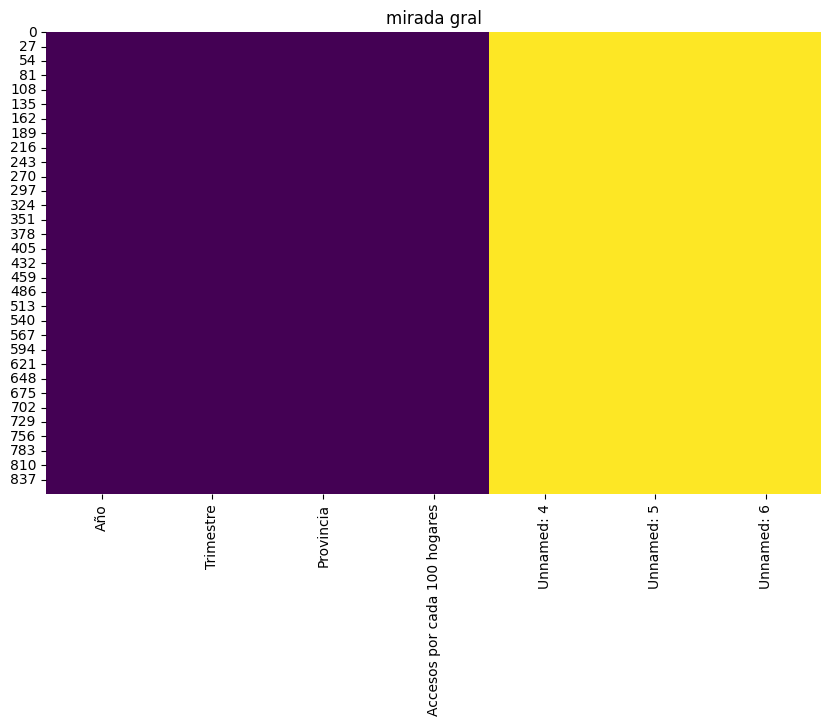

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

**Vamos a tomar la decision de trabajar con los elementos no nulos del dataframe**

In [ ]:
df_gral = df_gral.drop(columns = ['Unnamed: 4'])

KeyError: ignored

In [ ]:
df_gral = df_gral.drop(columns = ['Unnamed: 5'])

KeyError: ignored

In [ ]:
df_gral = df_gral.drop(columns = ['Unnamed: 6'])

In [ ]:
df_gral.head(10)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
5,2022,4,Córdoba,"89,03"
6,2022,4,Corrientes,"51,64"
7,2022,4,Entre Ríos,"64,01"
8,2022,4,Formosa,"39,41"
9,2022,4,Jujuy,"58,46"


In [ ]:
df_gral.shape

(864, 4)

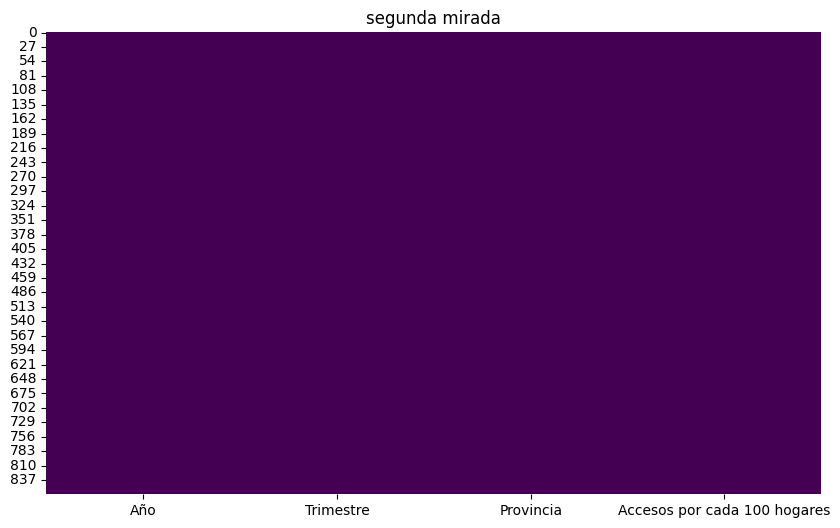

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral.isnull(), cmap='viridis', cbar=False)
plt.title('segunda mirada')
plt.show()

In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


In [ ]:
df_gral.tail(2)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
862,2014,1,Tierra Del Fuego,"63,97"
863,2014,1,Tucumán,"33,42"


In [ ]:
df_gral[35:800]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
35,2022,3,La Rioja,"80,66"
36,2022,3,Mendoza,"51,03"
37,2022,3,Misiones,"51,82"
38,2022,3,Neuquén,"80,37"
39,2022,3,Río Negro,"67,98"
...,...,...,...,...
795,2014,3,Chaco,"21,11"
796,2014,3,Chubut,"40,60"
797,2014,3,Córdoba,"54,23"
798,2014,3,Corrientes,"22,79"


In [ ]:
df_gral['Accesos por cada 100 hogares'] = df_gral['Accesos por cada 100 hogares'].astype(float)
df_gral['Accesos por cada 100 hogares'] = df_gral['Accesos por cada 100 hogares'].astype(str).str.replace(',', '.').astype(float)


In [ ]:
df_gral['Accesos por cada 100 hogares'] = df_gral['Accesos por cada 100 hogares'].round()

In [ ]:
df_gral['Accesos por cada 100 hogares'] = df_gral['Accesos por cada 100 hogares'].astype(int)


In [ ]:
df_gral['Accesos por cada 100 hogares'] = df_gral['Accesos por cada 100 hogares'].astype(str).str.replace(',', '')

In [ ]:
df_gral['Accesos por cada 100 hogares'] = df_gral['Accesos por cada 100 hogares'].str.strip("'").astype(int)

In [ ]:
df_gral['Accesos por cada 100 hogares'].unique().tolist()

[79,
 123,
 66,
 44,
 86,
 89,
 52,
 64,
 39,
 58,
 95,
 80,
 51,
 53,
 68,
 90,
 78,
 48,
 101,
 61,
 122,
 65,
 84,
 88,
 59,
 97,
 81,
 82,
 43,
 100,
 121,
 62,
 83,
 87,
 57,
 93,
 49,
 76,
 112,
 35,
 92,
 74,
 67,
 56,
 77,
 47,
 98,
 111,
 55,
 85,
 46,
 63,
 34,
 73,
 40,
 72,
 45,
 70,
 75,
 110,
 33,
 41,
 69,
 108,
 60,
 50,
 54,
 42,
 32,
 36,
 37,
 106,
 31,
 38,
 71,
 30,
 113,
 96,
 29,
 109,
 24,
 94,
 23,
 107,
 15,
 21,
 11,
 124,
 26,
 20,
 22,
 16,
 27,
 10,
 14,
 19,
 17,
 120,
 115,
 28,
 118,
 116,
 25,
 18,
 114,
 9]

In [ ]:
df_gral.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,79
1,2022,4,Capital Federal,123
2,2022,4,Catamarca,66


In [ ]:
df_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 27.1+ KB


In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx1_penetracion_internet_fijo.csv", index=True)

In [ ]:
#df_gral = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_steam_games.csv')
#df_gral.to_parquet('/content/drive/MyDrive/Proyect_games/dfx_steam_games.parquet')

# **Lectura y limpieza - Penetración por hogares nacional de Internet fijo**

**Serie trimestral de la penetración del Internet fijo en la métrica por cada 100 hogares**

In [ ]:
df_gral1 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Penetración por hogares nacional de Internet fijo.csv')

In [ ]:
df_gral1.shape


(36, 5)

In [ ]:
df_gral1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


**Lo veamos desde un grafico**

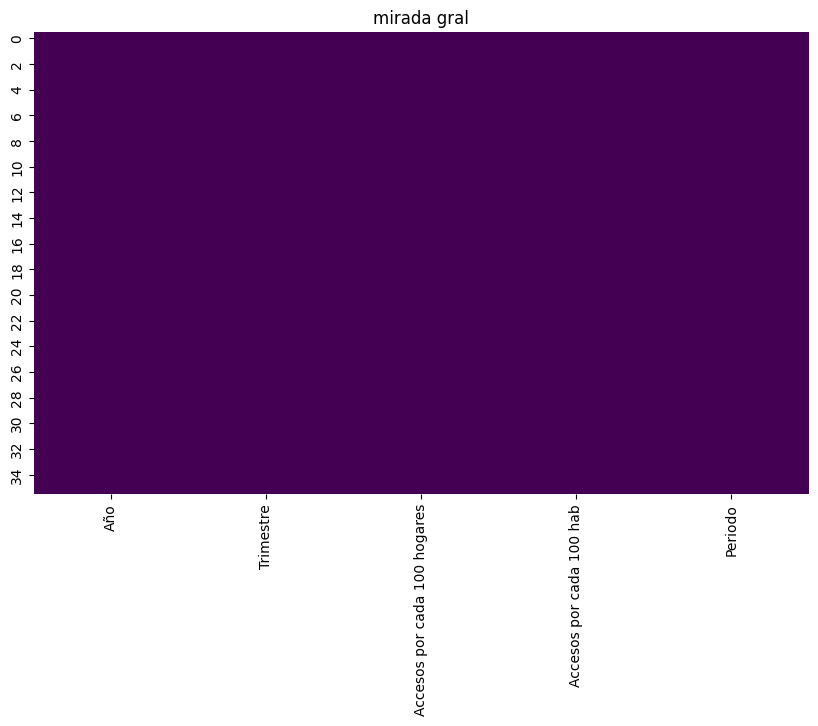

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral1.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral1.head(10)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021
5,2021,3,"70,58","21,98",Jul-Sept 2021
6,2021,2,"69,24","21,55",Abr-Jun 2021
7,2021,1,"67,95","21,13",Ene-Mar 2021
8,2020,4,"67,62","21,01",Oct-Dic 2020
9,2020,3,"66,31","20,59",Jul-Sept 2020


In [ ]:
df_gral1.tail(5)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
31,2015,1,"51,36","15,68",Ene-Mar 2015
32,2014,4,"50,50","15,39",Oct-Dic 2014
33,2014,3,"50,67","15,43",Jul-Sept 2014
34,2014,2,"49,86","15,16",Abr-Jun 2014
35,2014,1,"49,55","15,05",Ene-Mar 2014


In [ ]:
df_gral['Año'].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

In [ ]:
df_gral['Trimestre'].unique().tolist()

[4, 3, 2, 1]

In [ ]:
df_gral1['Periodo'].unique().tolist()

['Oct-Dic 2022',
 'Jul-Sept 2022',
 'Abr-Jun 2022',
 'Ene-Mar 2022',
 'Oct-Dic 2021',
 'Jul-Sept 2021',
 'Abr-Jun 2021',
 'Ene-Mar 2021',
 'Oct-Dic 2020',
 'Jul-Sept 2020',
 'Abr-Jun 2020',
 'Ene-Mar 2020',
 'Oct-Dic 2019',
 'Jul-Sept 2019',
 'Abr-Jun 2019',
 'Ene-Mar 2019',
 'Oct-Dic 2018',
 'Jul-Sept 2018',
 'Abr-Jun 2018',
 'Ene-Mar 2018',
 'Oct-Dic 2017',
 'Jul-Sept 2017',
 'Abr-Jun 2017',
 'Ene-Mar 2017',
 'Oct-Dic 2016',
 'Jul-Sept 2016',
 'Abr-Jun 2016',
 'Ene-Mar 2016',
 'Oct-Dic 2015',
 'Jul-Sept 2015',
 'Abr-Jun 2015',
 'Ene-Mar 2015',
 'Oct-Dic 2014',
 'Jul-Sept 2014',
 'Abr-Jun 2014',
 'Ene-Mar 2014']

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral1.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx2_penetracion_hogares_nacional_internet_fijo.csv", index=True)

In [ ]:
#df_gral = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_steam_games.csv')
#df_gral.to_parquet('/content/drive/MyDrive/Proyect_games/dfx_steam_games.parquet')

# **Lectura y limpieza - Total nacional de accesos a Internet fijo por banda ancha y banda angosta**

In [ ]:
df_gral2 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Total nacional de accesos a Internet fijo por banda ancha y banda angosta.csv')

In [ ]:
df_gral2.shape


(36, 6)

In [ ]:
df_gral2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


**Lo veamos desde un grafico**

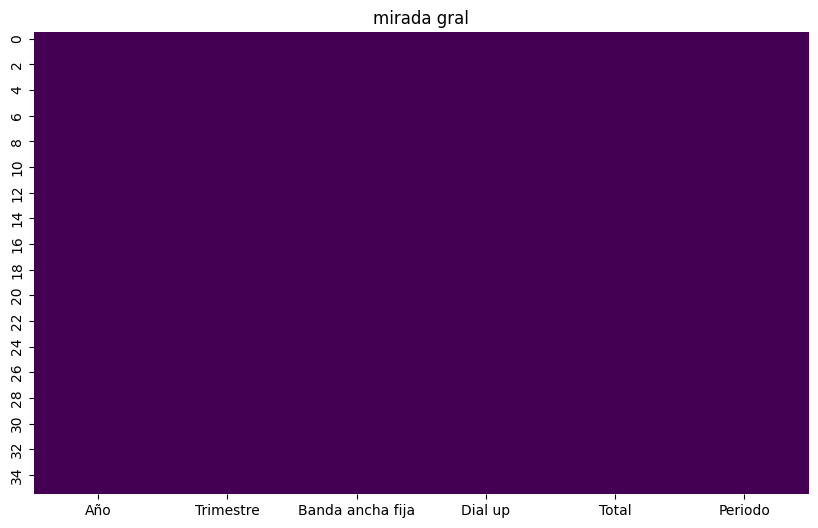

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral2.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral2.head(10)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021
5,2021,3,10,10,10,Jul-Sept 2021
6,2021,2,10,10,10,Abr-Jun 2021
7,2021,1,10,10,10,Ene-Mar 2021
8,2020,4,10,10,10,Oct-Dic 2020
9,2020,3,9,10,9,Jul-Sept 2020


In [ ]:
df_gral2.tail(12)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
24,2016,4,7,29,7,Oct-Dic 2016
25,2016,3,7,29,7,Jul-Sept 2016
26,2016,2,7,32,7,Abr-Jun 2016
27,2016,1,7,33,7,Ene-Mar 2016
28,2015,4,7,33,7,Oct-Dic 2015
29,2015,3,7,33,7,Jul-Sept 2015
30,2015,2,7,33,7,Abr-Jun 2015
31,2015,1,7,38,7,Ene-Mar 2015
32,2014,4,7,39,7,Oct-Dic 2014
33,2014,3,7,36,7,Jul-Sept 2014


In [ ]:
df_gral2['Año'].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

In [ ]:
df_gral2['Trimestre'].unique().tolist()

[4, 3, 2, 1]

In [ ]:
df_gral2['Banda ancha fija'].unique().tolist()

[11, 10, 9, 8, 7, 6]

In [ ]:
df_gral2['Dial up'].unique().tolist()

[12, 13, 10, 22, 27, 28, 29, 32, 33, 38, 39, 36]

In [ ]:
df_gral2['Total'].unique().tolist()

[11, 10, 9, 8, 7, 6]

In [ ]:
df_gral2['Periodo'].unique().tolist()

['Oct-Dic 2022',
 'Jul-Sept 2022',
 'Abr-Jun 2022',
 'Ene-Mar 2022',
 'Oct-Dic 2021',
 'Jul-Sept 2021',
 'Abr-Jun 2021',
 'Ene-Mar 2021',
 'Oct-Dic 2020',
 'Jul-Sept 2020',
 'Abr-Jun 2020',
 'Ene-Mar 2020',
 'Oct-Dic 2019',
 'Jul-Sept 2019',
 'Abr-Jun 2019',
 'Ene-Mar 2019',
 'Oct-Dic 2018',
 'Jul-Sept 2018',
 'Abr-Jun 2018',
 'Ene-Mar 2018',
 'Oct-Dic 2017',
 'Jul-Sept 2017',
 'Abr-Jun 2017',
 'Ene-Mar 2017',
 'Oct-Dic 2016',
 'Jul-Sept 2016',
 'Abr-Jun 2016',
 'Ene-Mar 2016',
 'Oct-Dic 2015',
 'Jul-Sept 2015',
 'Abr-Jun 2015',
 'Ene-Mar 2015',
 'Oct-Dic 2014',
 'Jul-Sept 2014',
 'Abr-Jun 2014',
 'Ene-Mar 2014']

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral2.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx3_Total_nacional_de_accesos_Internet_fijo_por_banda_ancha_y_banda_angosta.csv", index=True)

In [ ]:
#df_gral = pd.read_csv('/content/drive/MyDrive/Proyect_games/dfx_steam_games.csv')
#df_gral.to_parquet('/content/drive/MyDrive/Proyect_games/dfx_steam_games.parquet')

# **Lectura y Limpieza - Accesos a banda ancha y banda angosta por provincia**

In [ ]:
df_gral3 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Accesos a banda ancha y banda angosta por provincia.csv')

In [ ]:
df_gral3.shape


(864, 6)

In [ ]:
df_gral3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


**Lo veamos desde un grafico**

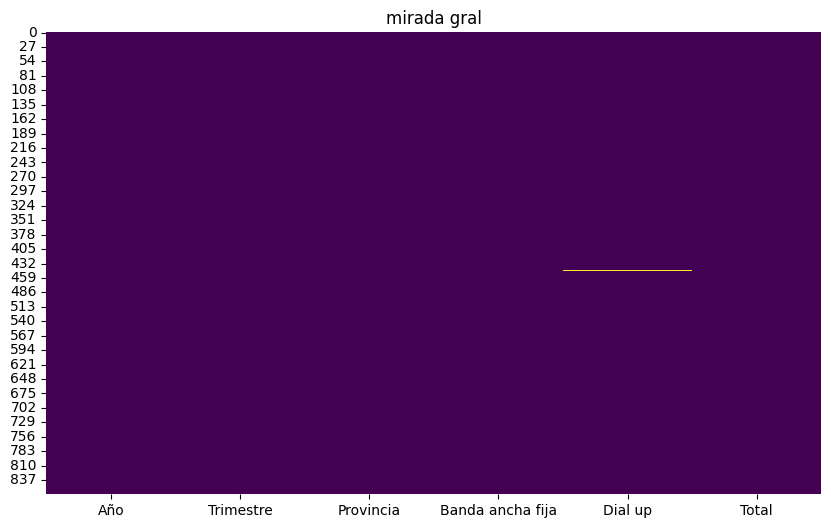

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral3.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral3 = df_gral3.dropna()

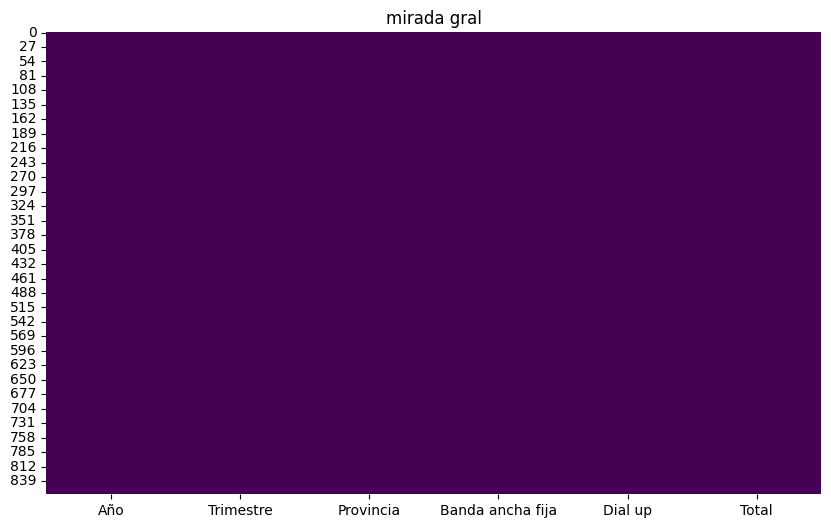

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral3.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral3.tail(12)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
852,2014,1,Mendoza,164,2.0,166
853,2014,1,Misiones,74,0.0,74
854,2014,1,Neuquén,88,2.0,90
855,2014,1,Río Negro,94,1.0,95
856,2014,1,Salta,91,25.0,91
857,2014,1,San Juan,51,755.0,51
858,2014,1,San Luis,12,364.0,13
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37


In [ ]:
df_gral3['Año'].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

In [ ]:
df_gral3['Trimestre'].unique().tolist()

[4, 3, 2, 1]

In [ ]:
df_gral3['Banda ancha fija'].unique().tolist()

[5,
 2,
 71,
 144,
 168,
 1,
 155,
 271,
 62,
 118,
 114,
 86,
 291,
 186,
 160,
 162,
 206,
 104,
 135,
 50,
 888,
 119,
 55,
 263,
 70,
 165,
 145,
 269,
 69,
 116,
 87,
 289,
 182,
 163,
 205,
 103,
 122,
 49,
 54,
 67,
 68,
 115,
 111,
 279,
 179,
 159,
 203,
 100,
 879,
 53,
 254,
 171,
 143,
 268,
 117,
 110,
 84,
 274,
 172,
 149,
 157,
 198,
 88,
 120,
 870,
 52,
 246,
 59,
 987,
 136,
 265,
 107,
 83,
 267,
 147,
 153,
 199,
 80,
 48,
 866,
 239,
 4,
 56,
 140,
 947,
 134,
 260,
 82,
 255,
 139,
 196,
 79,
 841,
 232,
 141,
 138,
 931,
 129,
 258,
 112,
 98,
 229,
 156,
 192,
 123,
 840,
 35,
 233,
 132,
 911,
 127,
 252,
 51,
 97,
 218,
 133,
 188,
 78,
 46,
 826,
 40,
 130,
 903,
 126,
 247,
 106,
 215,
 187,
 72,
 821,
 39,
 231,
 867,
 241,
 94,
 207,
 131,
 181,
 77,
 803,
 105,
 224,
 128,
 108,
 836,
 234,
 90,
 201,
 178,
 778,
 217,
 96,
 811,
 92,
 89,
 183,
 121,
 170,
 64,
 771,
 200,
 38,
 95,
 807,
 47,
 185,
 65,
 769,
 32,
 783,
 113,
 238,
 91,
 223,
 152,
 73

In [ ]:
df_gral3['Dial up'].unique().tolist()

[6.0,
 2.0,
 1.0,
 5.0,
 904.0,
 68.0,
 4.0,
 22.0,
 0.0,
 171.0,
 777.0,
 468.0,
 548.0,
 281.0,
 192.0,
 198.0,
 110.0,
 312.0,
 30.0,
 182.0,
 927.0,
 74.0,
 172.0,
 786.0,
 471.0,
 553.0,
 290.0,
 185.0,
 204.0,
 115.0,
 313.0,
 944.0,
 77.0,
 173.0,
 804.0,
 477.0,
 564.0,
 291.0,
 187.0,
 210.0,
 176.0,
 315.0,
 3.0,
 800.0,
 62.0,
 15.0,
 116.0,
 619.0,
 373.0,
 501.0,
 256.0,
 148.0,
 197.0,
 151.0,
 289.0,
 25.0,
 825.0,
 55.0,
 13.0,
 615.0,
 137.0,
 810.0,
 119.0,
 623.0,
 376.0,
 504.0,
 259.0,
 200.0,
 150.0,
 23.0,
 10.0,
 9.0,
 107.0,
 45.0,
 269.0,
 18.0,
 563.0,
 328.0,
 228.0,
 544.0,
 32.0,
 105.0,
 44.0,
 268.0,
 915.0,
 325.0,
 226.0,
 227.0,
 229.0,
 11.0,
 7.0,
 12.0,
 94.0,
 48.0,
 244.0,
 17.0,
 658.0,
 300.0,
 434.0,
 217.0,
 508.0,
 31.0,
 435.0,
 309.0,
 101.0,
 396.0,
 49.0,
 659.0,
 323.0,
 34.0,
 108.0,
 50.0,
 410.0,
 660.0,
 311.0,
 583.0,
 33.0,
 8.0,
 14.0,
 133.0,
 57.0,
 449.0,
 998.0,
 620.0,
 369.0,
 362.0,
 37.0,
 455.0,
 370.0,
 460.0,
 461.0,
 

In [ ]:
df_gral3['Total'].unique().tolist()

[5,
 2,
 71,
 144,
 169,
 1,
 155,
 271,
 62,
 118,
 114,
 86,
 292,
 186,
 160,
 162,
 206,
 104,
 135,
 50,
 888,
 119,
 55,
 263,
 70,
 166,
 145,
 269,
 69,
 116,
 87,
 290,
 182,
 163,
 161,
 205,
 103,
 122,
 54,
 67,
 68,
 115,
 112,
 280,
 179,
 203,
 100,
 49,
 879,
 255,
 172,
 143,
 268,
 117,
 110,
 84,
 275,
 150,
 157,
 198,
 88,
 120,
 870,
 53,
 246,
 59,
 987,
 136,
 265,
 107,
 83,
 171,
 147,
 154,
 199,
 80,
 48,
 866,
 52,
 239,
 4,
 56,
 140,
 156,
 947,
 134,
 260,
 111,
 82,
 256,
 159,
 196,
 79,
 842,
 232,
 141,
 139,
 931,
 130,
 258,
 98,
 230,
 138,
 192,
 123,
 841,
 36,
 233,
 132,
 911,
 127,
 252,
 51,
 97,
 219,
 149,
 133,
 188,
 78,
 46,
 826,
 40,
 131,
 903,
 126,
 247,
 106,
 215,
 187,
 73,
 41,
 821,
 231,
 867,
 241,
 94,
 208,
 129,
 181,
 77,
 39,
 803,
 105,
 224,
 128,
 109,
 836,
 234,
 90,
 201,
 178,
 778,
 217,
 811,
 92,
 89,
 183,
 170,
 64,
 771,
 200,
 38,
 96,
 807,
 47,
 65,
 108,
 769,
 32,
 783,
 113,
 238,
 91,
 125,
 152,
 76

In [ ]:
df_gral3['Provincia'].unique().tolist()

['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán']

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral3.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx4_Accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv", index=True)

# **Lectura y Limpieza - Serie trimestral de accesos a Internet fijo por tecnología**

In [ ]:
df_gral4 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Serie trimestral de accesos a Internet fijo por tecnología.csv')

In [ ]:
df_gral4.shape


(36, 9)

In [ ]:
df_gral4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


**Lo veamos desde un grafico**

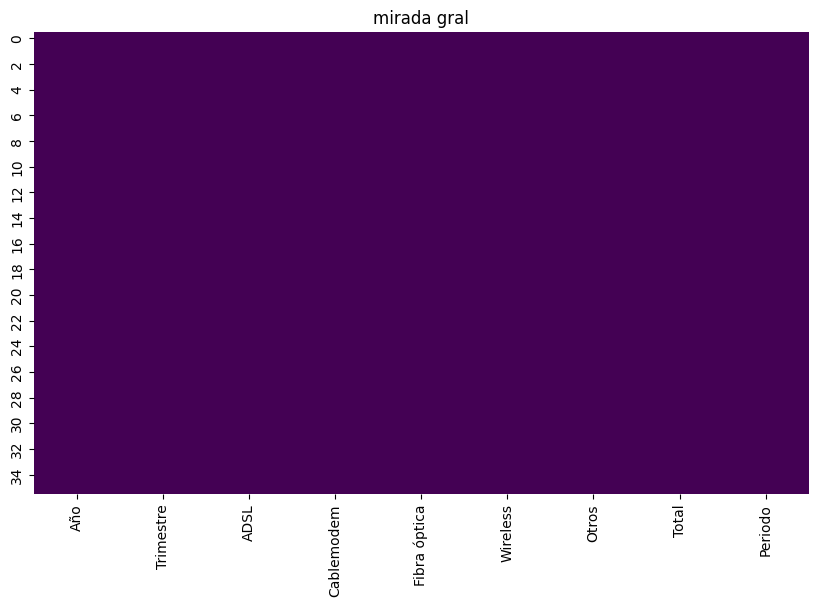

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral4.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral4.tail(12)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
24,2016,4,4,3,178,85,55,7,Oct-Dic 2016
25,2016,3,4,3,170,81,54,7,Jul-Sept 2016
26,2016,2,4,3,168,85,59,7,Abr-Jun 2016
27,2016,1,4,3,164,85,59,7,Ene-Mar 2016
28,2015,4,4,3,139,86,59,7,Oct-Dic 2015
29,2015,3,4,3,163,85,59,7,Jul-Sept 2015
30,2015,2,4,3,151,82,59,7,Abr-Jun 2015
31,2015,1,4,3,168,79,66,7,Ene-Mar 2015
32,2014,4,4,3,150,77,72,7,Oct-Dic 2014
33,2014,3,4,3,155,85,70,7,Jul-Sept 2014


In [ ]:
df_gral4['Año'].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

In [ ]:
df_gral4['ADSL'].unique().tolist()

[1, 2, 3, 4]

In [ ]:
df_gral4['Cablemodem'].unique().tolist()

[6, 5, 4, 3, 2]

In [ ]:
df_gral4['Fibra óptica'].unique().tolist()

[3,
 2,
 1,
 941,
 852,
 761,
 637,
 388,
 247,
 226,
 217,
 211,
 194,
 181,
 180,
 178,
 170,
 168,
 164,
 139,
 163,
 151,
 150,
 155,
 149]

In [ ]:
df_gral4['Wireless'].unique().tolist()

[573,
 557,
 556,
 546,
 523,
 492,
 477,
 435,
 422,
 413,
 377,
 352,
 340,
 338,
 308,
 276,
 264,
 246,
 194,
 165,
 156,
 106,
 86,
 85,
 81,
 82,
 79,
 77,
 72,
 71]

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral4.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx5_Internet_fijo_por_tecnología.csv", index=True)

# **Lectura y Limpieza - Acceso a Internet fijo por tecnología y provincia**

In [ ]:
df_gral5 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Acceso a Internet fijo por tecnología y provincia.csv')

In [ ]:
df_gral5.shape


(865, 9)

In [ ]:
df_gral5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


**Lo veamos desde un grafico**

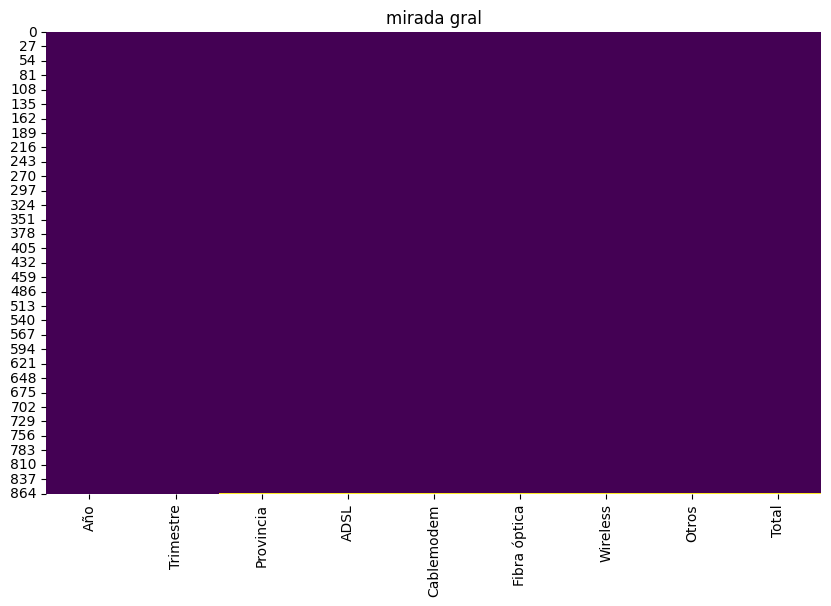

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral5.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral5.tail(12)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
853,2014,1,Misiones,57.0,17.0,4.0,150.0,8.0,74.0
854,2014,1,Neuquén,48.0,28.0,997.0,10.0,3.0,90.0
855,2014,1,Río Negro,65.0,24.0,876.0,4.0,2.0,95.0
856,2014,1,Salta,73.0,18.0,45.0,8.0,568.0,91.0
857,2014,1,San Juan,48.0,434.0,722.0,808.0,1.0,51.0
858,2014,1,San Luis,11.0,428.0,354.0,21.0,448.0,13.0
859,2014,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


In [ ]:
df_gral5= df_gral5.dropna()

In [ ]:
df_gral5.tail(12)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
852,2014,1,Mendoza,149.0,12.0,2.0,37.0,2.0,166.0
853,2014,1,Misiones,57.0,17.0,4.0,150.0,8.0,74.0
854,2014,1,Neuquén,48.0,28.0,997.0,10.0,3.0,90.0
855,2014,1,Río Negro,65.0,24.0,876.0,4.0,2.0,95.0
856,2014,1,Salta,73.0,18.0,45.0,8.0,568.0,91.0
857,2014,1,San Juan,48.0,434.0,722.0,808.0,1.0,51.0
858,2014,1,San Luis,11.0,428.0,354.0,21.0,448.0,13.0
859,2014,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0


In [ ]:
df_gral5['Año'].unique().tolist()

['2022',
 '2021',
 '2020',
 '2019',
 '2019 *',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014']

In [ ]:
df_gral5['ADSL'].unique().tolist()

[326.0,
 139.0,
 9.0,
 25.0,
 45.0,
 152.0,
 34.0,
 56.0,
 14.0,
 18.0,
 8.0,
 6.0,
 38.0,
 33.0,
 29.0,
 37.0,
 39.0,
 10.0,
 164.0,
 13.0,
 69.0,
 340.0,
 141.0,
 27.0,
 60.0,
 19.0,
 7.0,
 36.0,
 40.0,
 184.0,
 15.0,
 78.0,
 351.0,
 145.0,
 12.0,
 30.0,
 179.0,
 64.0,
 20.0,
 43.0,
 198.0,
 17.0,
 86.0,
 392.0,
 102.0,
 32.0,
 44.0,
 196.0,
 67.0,
 16.0,
 21.0,
 49.0,
 28.0,
 11.0,
 213.0,
 93.0,
 426.0,
 111.0,
 46.0,
 212.0,
 70.0,
 22.0,
 42.0,
 47.0,
 233.0,
 98.0,
 586.0,
 143.0,
 229.0,
 74.0,
 24.0,
 91.0,
 48.0,
 246.0,
 104.0,
 603.0,
 149.0,
 240.0,
 92.0,
 51.0,
 257.0,
 110.0,
 630.0,
 160.0,
 26.0,
 260.0,
 84.0,
 55.0,
 277.0,
 147.0,
 636.0,
 163.0,
 267.0,
 50.0,
 57.0,
 287.0,
 654.0,
 170.0,
 276.0,
 88.0,
 58.0,
 295.0,
 150.0,
 661.0,
 283.0,
 89.0,
 300.0,
 673.0,
 286.0,
 90.0,
 302.0,
 720.0,
 197.0,
 23.0,
 297.0,
 53.0,
 97.0,
 63.0,
 41.0,
 312.0,
 1.0,
 308.0,
 95.0,
 54.0,
 66.0,
 52.0,
 319.0,
 151.0,
 310.0,
 315.0,
 68.0,
 325.0,
 153.0,
 328.0,
 323.0

In [ ]:
df_gral5['Cablemodem'].unique().tolist()

[3.0,
 1.0,
 11.0,
 61.0,
 74.0,
 457.0,
 80.0,
 136.0,
 17.0,
 52.0,
 54.0,
 78.0,
 87.0,
 73.0,
 48.0,
 97.0,
 23.0,
 43.0,
 24.0,
 412.0,
 81.0,
 41.0,
 21.0,
 10.0,
 62.0,
 72.0,
 465.0,
 77.0,
 133.0,
 26.0,
 53.0,
 60.0,
 79.0,
 89.0,
 76.0,
 29.0,
 426.0,
 40.0,
 19.0,
 9.0,
 69.0,
 468.0,
 131.0,
 25.0,
 59.0,
 75.0,
 47.0,
 96.0,
 20.0,
 428.0,
 15.0,
 16.0,
 65.0,
 67.0,
 502.0,
 139.0,
 92.0,
 45.0,
 99.0,
 14.0,
 445.0,
 88.0,
 39.0,
 63.0,
 57.0,
 487.0,
 71.0,
 58.0,
 44.0,
 100.0,
 13.0,
 444.0,
 38.0,
 12.0,
 64.0,
 56.0,
 477.0,
 129.0,
 55.0,
 98.0,
 443.0,
 86.0,
 37.0,
 125.0,
 432.0,
 84.0,
 2.0,
 4.0,
 118.0,
 35.0,
 82.0,
 70.0,
 42.0,
 421.0,
 27.0,
 5.0,
 439.0,
 114.0,
 68.0,
 7.0,
 415.0,
 431.0,
 107.0,
 406.0,
 8.0,
 382.0,
 95.0,
 50.0,
 66.0,
 6.0,
 384.0,
 410.0,
 49.0,
 399.0,
 36.0,
 377.0,
 388.0,
 91.0,
 31.0,
 355.0,
 364.0,
 90.0,
 34.0,
 340.0,
 356.0,
 323.0,
 342.0,
 51.0,
 33.0,
 313.0,
 978.0,
 328.0,
 304.0,
 968.0,
 327.0,
 32.0,
 300.0,
 96

In [ ]:
df_gral5['Fibra óptica'].unique().tolist()

[1.0,
 139.0,
 47.0,
 10.0,
 367.0,
 27.0,
 41.0,
 13.0,
 43.0,
 25.0,
 19.0,
 147.0,
 32.0,
 44.0,
 53.0,
 12.0,
 3.0,
 249.0,
 15.0,
 405.0,
 169.0,
 129.0,
 46.0,
 45.0,
 339.0,
 37.0,
 11.0,
 40.0,
 24.0,
 20.0,
 143.0,
 39.0,
 29.0,
 50.0,
 248.0,
 215.0,
 403.0,
 162.0,
 122.0,
 42.0,
 309.0,
 18.0,
 36.0,
 34.0,
 23.0,
 136.0,
 190.0,
 149.0,
 62.0,
 9.0,
 236.0,
 5.0,
 26.0,
 22.0,
 123.0,
 38.0,
 31.0,
 416.0,
 86.0,
 60.0,
 35.0,
 217.0,
 110.0,
 30.0,
 426.0,
 79.0,
 886.0,
 28.0,
 167.0,
 8.0,
 71.0,
 16.0,
 7.0,
 6.0,
 93.0,
 909.0,
 854.0,
 152.0,
 4.0,
 17.0,
 90.0,
 72.0,
 822.0,
 135.0,
 14.0,
 570.0,
 70.0,
 805.0,
 126.0,
 2.0,
 63.0,
 68.0,
 749.0,
 21.0,
 102.0,
 33.0,
 555.0,
 0.0,
 723.0,
 355.0,
 55.0,
 721.0,
 69.0,
 200.0,
 669.0,
 873.0,
 847.0,
 425.0,
 274.0,
 829.0,
 733.0,
 350.0,
 969.0,
 219.0,
 651.0,
 116.0,
 383.0,
 543.0,
 725.0,
 347.0,
 379.0,
 336.0,
 940.0,
 153.0,
 465.0,
 647.0,
 808.0,
 378.0,
 382.0,
 118.0,
 296.0,
 952.0,
 796.0,
 887.0,
 

In [ ]:
df_gral5['Wireless'].unique().tolist()

[130.0,
 5.0,
 1.0,
 8.0,
 31.0,
 62.0,
 9.0,
 26.0,
 18.0,
 4.0,
 20.0,
 6.0,
 28.0,
 11.0,
 24.0,
 16.0,
 12.0,
 22.0,
 82.0,
 44.0,
 7.0,
 157.0,
 127.0,
 30.0,
 61.0,
 17.0,
 27.0,
 10.0,
 71.0,
 43.0,
 125.0,
 126.0,
 23.0,
 21.0,
 72.0,
 45.0,
 124.0,
 2.0,
 25.0,
 3.0,
 19.0,
 120.0,
 58.0,
 14.0,
 15.0,
 69.0,
 114.0,
 56.0,
 13.0,
 67.0,
 99.0,
 322.0,
 54.0,
 250.0,
 64.0,
 39.0,
 0.0,
 93.0,
 53.0,
 63.0,
 94.0,
 261.0,
 48.0,
 952.0,
 37.0,
 92.0,
 85.0,
 42.0,
 942.0,
 251.0,
 460.0,
 87.0,
 38.0,
 814.0,
 441.0,
 55.0,
 725.0,
 86.0,
 244.0,
 812.0,
 419.0,
 684.0,
 75.0,
 146.0,
 34.0,
 421.0,
 57.0,
 65.0,
 640.0,
 252.0,
 426.0,
 678.0,
 253.0,
 686.0,
 641.0,
 391.0,
 234.0,
 388.0,
 204.0,
 368.0,
 60.0,
 380.0,
 158.0,
 102.0,
 35.0,
 36.0,
 29.0,
 911.0,
 40.0,
 52.0,
 151.0,
 132.0,
 74.0,
 129.0,
 88.0,
 899.0,
 737.0,
 33.0,
 670.0,
 150.0,
 920.0,
 109.0,
 768.0,
 907.0,
 808.0,
 915.0]

In [ ]:
df_gral5['Provincia'].unique().tolist()

['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán']

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral5.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx6_Acceso_a_Internet_fijo_por_tecnología_y_provincia.csv", index=True)

# **Lectura y Limpieza - Velocidad Media de bajada de Internet fijo**

In [ ]:
df_gral6 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Velocidad Media de bajada de Internet fijo.csv')

In [ ]:
df_gral6.shape


(36, 4)

In [ ]:
df_gral6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


**Lo veamos desde un grafico**

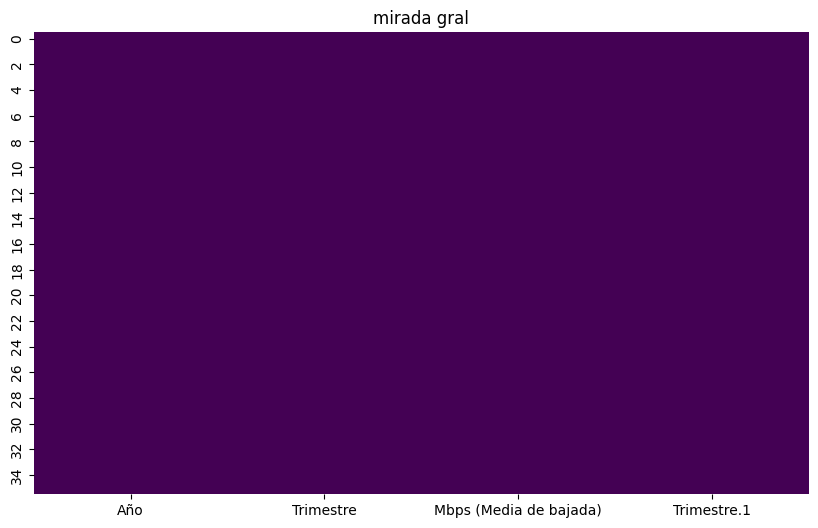

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral6.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral6.tail(12)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
24,2016,4,634.0,Oct-Dic 2016
25,2016,3,594.0,Jul-Sept 2016
26,2016,2,542.0,Abr-Jun 2016
27,2016,1,508.0,Ene-Mar 2016
28,2015,4,499.0,Oct-Dic 2015
29,2015,3,479.0,Jul-Sept 2015
30,2015,2,455.0,Abr-Jun 2015
31,2015,1,435.0,Ene-Mar 2015
32,2014,4,416.0,Oct-Dic 2014
33,2014,3,387.0,Jul-Sept 2014


In [ ]:
df_gral6= df_gral6.dropna()

In [ ]:
df_gral6.tail(12)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
24,2016,4,634.0,Oct-Dic 2016
25,2016,3,594.0,Jul-Sept 2016
26,2016,2,542.0,Abr-Jun 2016
27,2016,1,508.0,Ene-Mar 2016
28,2015,4,499.0,Oct-Dic 2015
29,2015,3,479.0,Jul-Sept 2015
30,2015,2,455.0,Abr-Jun 2015
31,2015,1,435.0,Ene-Mar 2015
32,2014,4,416.0,Oct-Dic 2014
33,2014,3,387.0,Jul-Sept 2014


In [ ]:
df_gral6['Año'].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

In [ ]:
df_gral6['Trimestre'].unique().tolist()

[4, 3, 2, 1]

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral6.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx7_Velocidad_Media_de_bajada_de_Internet_fijo.csv", index=True)

# **Lectura y Limpieza - Velocidad media de bajada de Internet fijo por provincia**

In [ ]:
df_gral7 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Velocidad media de bajada de Internet fijo por provincia.csv')

In [ ]:
df_gral7.shape


(864, 4)

In [ ]:
df_gral7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


**Lo veamos desde un grafico**

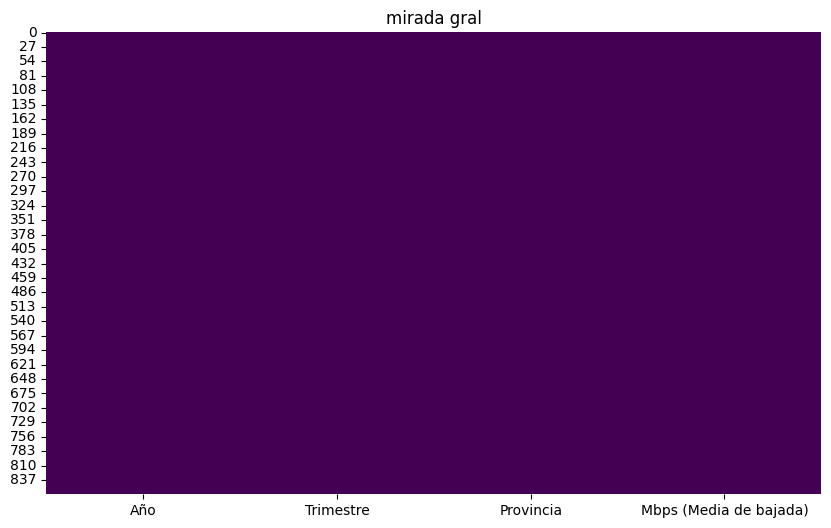

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral7.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral7.tail(12)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
852,2014,1,Mendoza,350.0
853,2014,1,Misiones,340.0
854,2014,1,Neuquén,355.0
855,2014,1,Río Negro,335.0
856,2014,1,Salta,330.0
857,2014,1,San Juan,347.0
858,2014,1,San Luis,350.0
859,2014,1,Santa Cruz,332.0
860,2014,1,Santa Fe,315.0
861,2014,1,Santiago Del Estero,295.0


In [ ]:
df_gral7['Año'].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

In [ ]:
df_gral7['Trimestre'].unique().tolist()

[4, 3, 2, 1]

In [ ]:
df_gral7['Provincia'].unique().tolist()

['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán']

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral7.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx8_Velocidad media de bajada de Internet fijo por provincia.csv", index=True)

# **Lectura y Limpieza - Distribución de los accesos totales nacionales a Internet fijo por velocidad**

In [ ]:
df_gral8 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Distribución de los accesos totales nacionales a Internet fijo por velocidad.csv')

In [ ]:
df_gral8.shape

(36, 11)

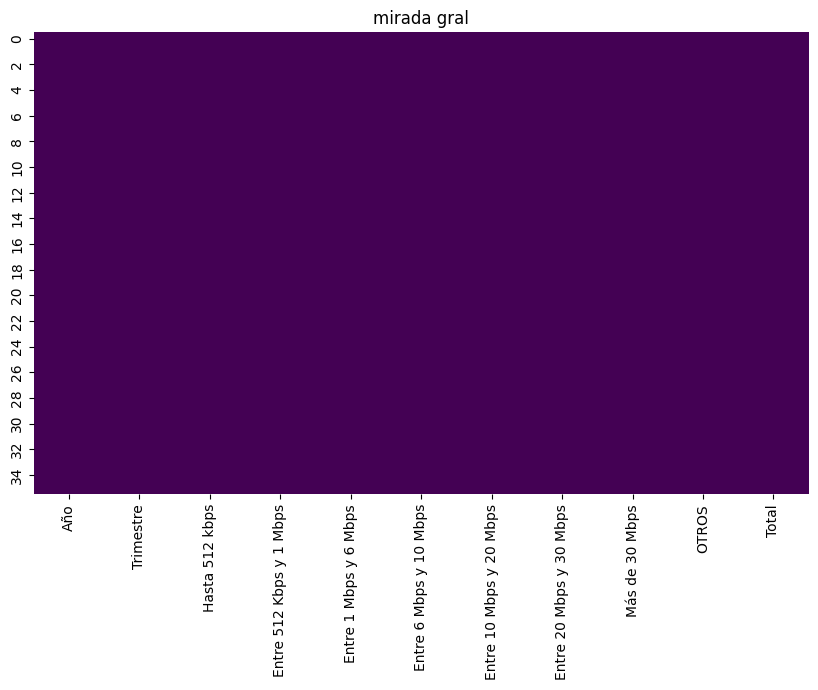

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral8.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral8.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx9_Distribución de los accesos totales nacionales a Internet fijo por velocidad.csv", index=True)

# **Lectura y Limpieza - Acceso a Internet Fijo por rangos de velocidad de bajada y provincia**

In [ ]:
df_gral9 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv')

In [ ]:
df_gral9.shape

(864, 12)

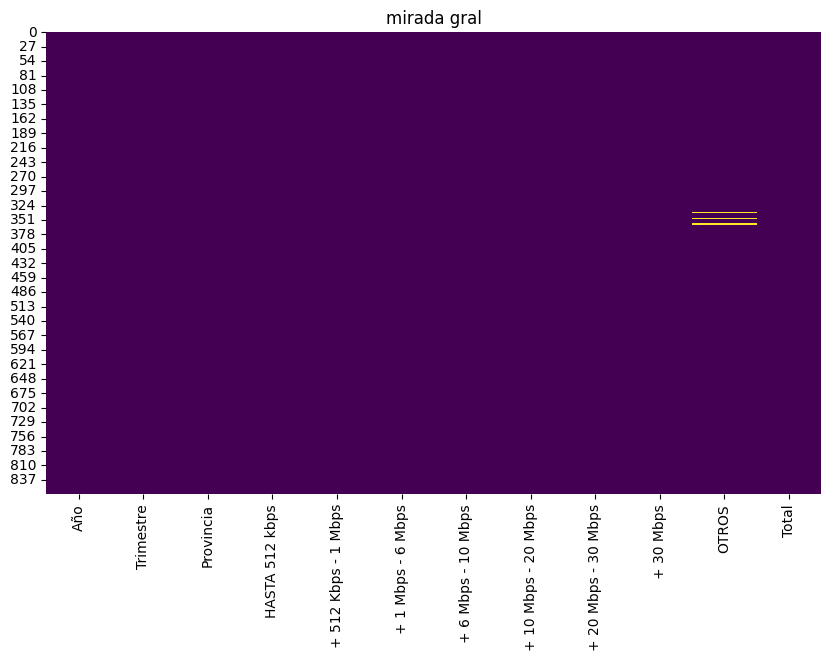

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral9.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
df_gral9 = df_gral9.dropna()

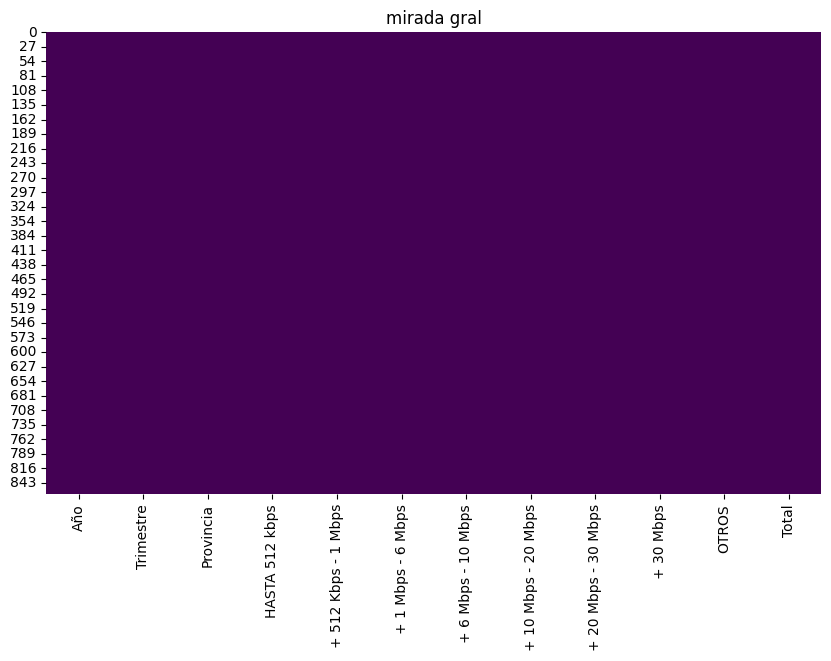

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral9.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral9.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx10_Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv", index=True)

# **Lectura y Limpieza - Accesos a Internet fijo por velocidad bajada y provincia**

In [ ]:
df_gral10 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Accesos a Internet fijo por velocidad bajada y provincia.csv')

In [ ]:
df_gral10.shape

(505, 97)

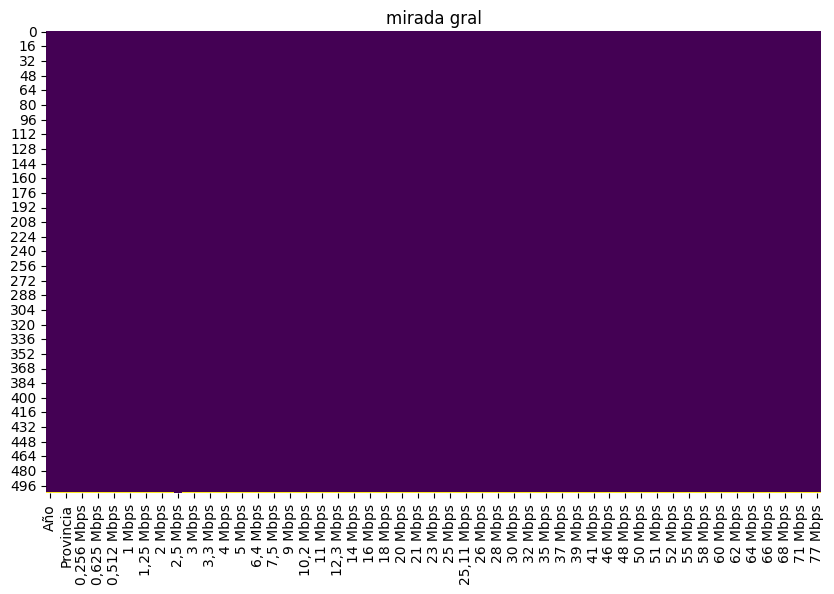

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral10.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral10.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx11_Accesos a Internet fijo por velocidad bajada y provincia.csv", index=True)

# **Lectura y Limpieza - Ingresos trimestrales por la prestación del servicio de Internet fijo**

In [ ]:
df_gral11 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Ingresos trimestrales por la prestación del servicio de Internet fijo.csv')

In [ ]:
df_gral11.shape

(36, 4)

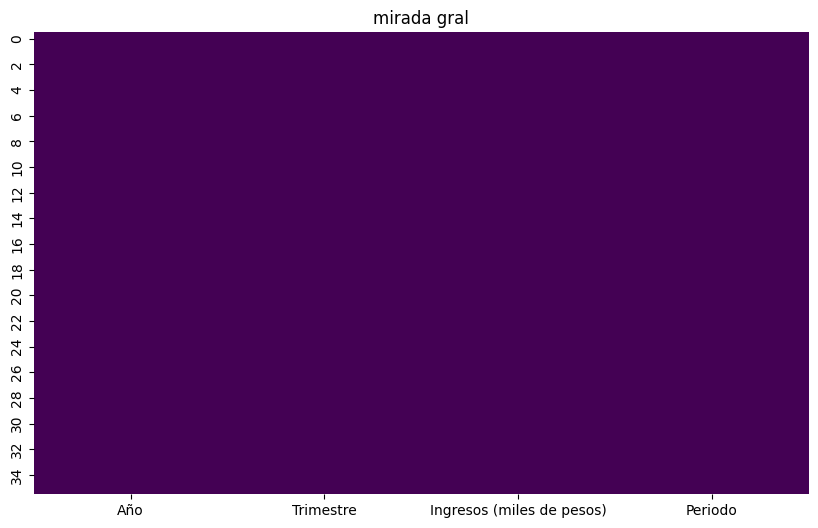

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral11.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral11.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx12_Ingresos trimestrales por la prestación del servicio de Internet fijo.csv", index=True)

# **Lectura y Limpieza - Penetración nacional de la telefonía móvil**

In [ ]:
df_gral12 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Penetración nacional de la telefonía móvil .csv')

In [ ]:
df_gral12.shape

(40, 4)

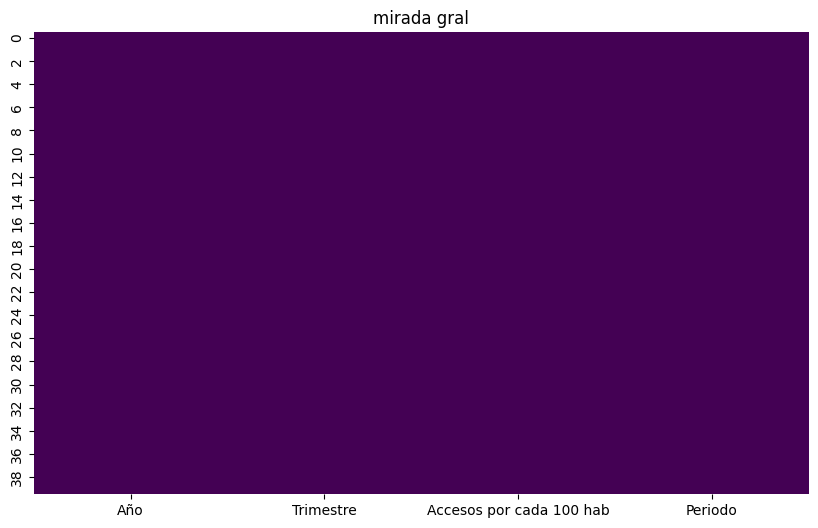

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral12.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral12.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx13_Penetración nacional de la telefonía móvil .csv", index=True)

# **Lectura y Limpieza - Ingresos trimestrales por la prestación del servicio de telefonía móvil**

In [ ]:
df_gral13 = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/Ingresos trimestrales por la prestación del servicio de telefonía móvil.csv')

In [ ]:
df_gral13.shape

(40, 4)

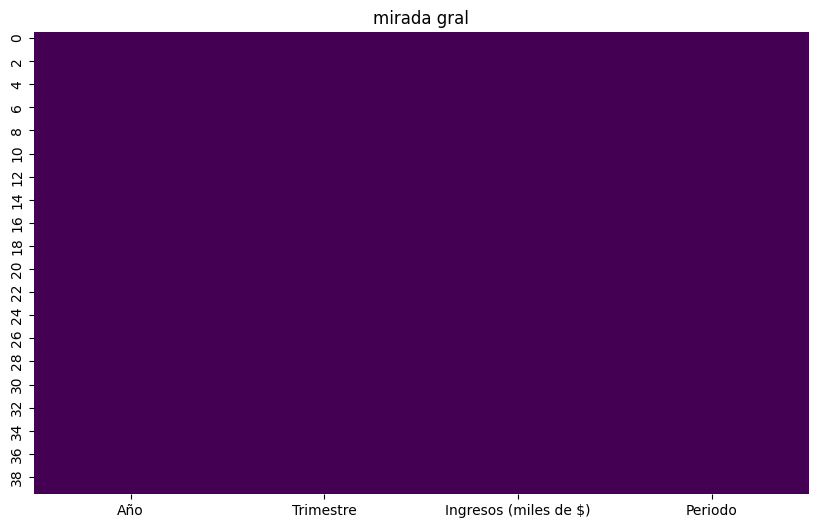

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_gral13.isnull(), cmap='viridis', cbar=False)
plt.title('mirada gral')
plt.show()

In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral13.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/dfx14_Ingresos trimestrales por la prestación del servicio de telefonía móvil.csv", index=True)


In [ ]:
#Guardar el DataFrame en un archivo CSV
df_gral13.to_excel("/content/drive/MyDrive/proyect_telecomunicaciones/Ingresos_Trimestrales_Movil.xlsx", index=True)



---



# **EDA - Analisis Exploratorio de Datos- Penetracion Internet fijo**

In [ ]:
dfx1_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx1_penetracion_internet_fijo.csv')


In [ ]:
dfx1_eda.shape

(864, 5)

In [ ]:
dfx1_eda.head(3)

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,0,2022,4,Buenos Aires,79
1,1,2022,4,Capital Federal,123
2,2,2022,4,Catamarca,66


# **Relacion y Exploración entre Variables Categoricas y Numericas**

***Correlación***

***Calcula la matriz de correlación para entender las relaciones lineales entre las variables numéricas. En este caso, podrías calcular la correlación entre las columnas 'Accesos por cada 100 hogares' y las variables numéricas 'Año' y 'Trimestre'.***

In [ ]:
correlacion = dfx1_eda[['Año', 'Trimestre', 'Accesos por cada 100 hogares']].corr()
print(correlacion)


                                       Año     Trimestre  \
Año                           1.000000e+00 -6.636002e-15   
Trimestre                    -6.636002e-15  1.000000e+00   
Accesos por cada 100 hogares  4.354024e-01  5.597326e-02   

                              Accesos por cada 100 hogares  
Año                                               0.435402  
Trimestre                                         0.055973  
Accesos por cada 100 hogares                      1.000000  


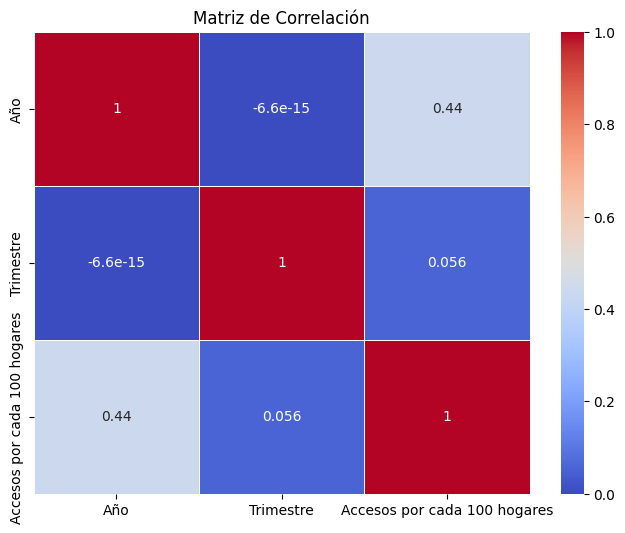

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

**Analisis:**
**Autocorrelación:**

La diagonal principal (de arriba a la izquierda a abajo a la derecha) muestra la correlación de cada variable consigo misma. Esto siempre es 1.0 porque una variable está perfectamente correlacionada consigo misma.

**Correlación entre Año y Trimestre:**

El valor en la fila 'Año' y la columna 'Trimestre', así como en la fila 'Trimestre' y la columna 'Año', es aproximadamente 0.
 . Esto indica que no hay una correlación lineal fuerte entre el año y el trimestre. Es prácticamente cero, lo que sugiere que no hay una relación lineal significativa entre estas dos variables.

** Correlación entre Año y Accesos por cada 100 hogares:**

El valor en la fila 'Año' y la columna 'Accesos por cada 100 hogares', así como en la fila 'Accesos por cada 100 hogares' y la columna 'Año', es aproximadamente 0.435. Esto indica una correlación positiva moderada entre el año y el número de accesos por cada 100 hogares.

**Correlación entre Trimestre y Accesos por cada 100 hogares:**

El valor en la fila 'Trimestre' y la columna 'Accesos por cada 100 hogares', así como en la fila 'Accesos por cada 100 hogares' y la columna 'Trimestre', es aproximadamente 0.056. Esto indica una correlación positiva débil entre el trimestre y el número de accesos por cada 100 hogares.

La matriz de correlación sugiere que hay una correlación positiva moderada entre el año y el número de accesos por cada 100 hogares, mientras que la correlación con el trimestre es débil.


**Gráfico de Dispersión:**
**Gráficos de dispersión para visualizar la relación entre 'Año',** **'Trimestre' y 'Accesos por cada 100 hogares'.**  

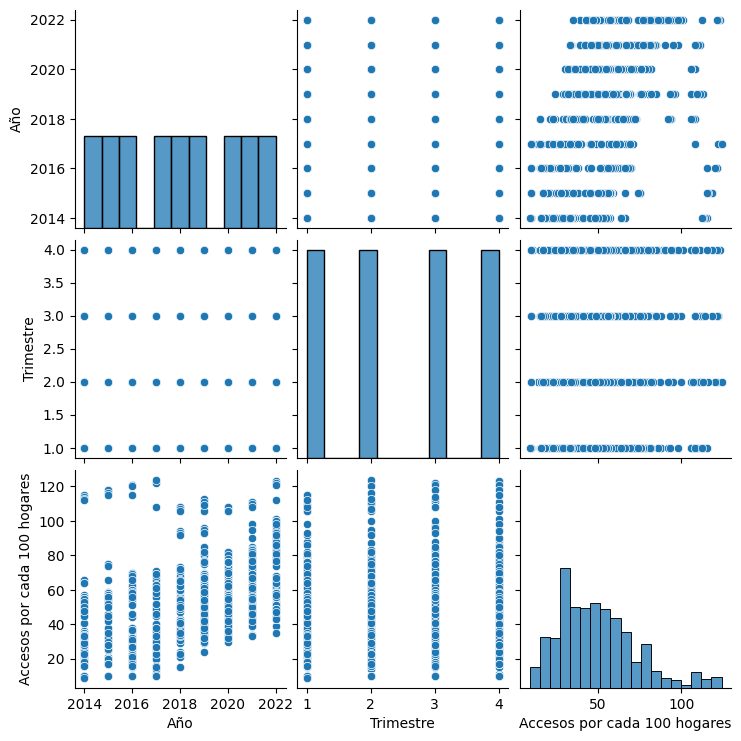

In [ ]:
sns.pairplot(dfx1_eda[['Año', 'Trimestre', 'Accesos por cada 100 hogares']])
plt.show()

El gráfico pairplot de Seaborn que estás generando con las variables 'Año', 'Trimestre' y 'Accesos por cada 100 hogares' proporcionará una visión visual de las distribuciones individuales y de las relaciones entre pares de estas variables. Aquí hay algunas observaciones típicas que podrías hacer con este gráfico:                                                                    
**Distribuciones Univariables**:                                            Para cada variable ('Año', 'Trimestre', 'Accesos por cada 100 hogares'), observarás un histograma en la diagonal principal. Estos histogramas te darán una idea de la distribución de cada variable por separado.     

**Relaciones Bivariadas:**
En las celdas fuera de la diagonal principal, verás gráficos de dispersión que muestran la relación entre dos variables a la vez. Esto te permitirá observar cómo 'Año' se relaciona con 'Trimestre' y cómo 'Año' y 'Trimestre' se relacionan con 'Accesos por cada 100 hogares'.   

**Correlación Visual:**
La intensidad y dirección de la dispersión en los gráficos de dispersión te darán una indicación visual de la correlación entre las variables. Por ejemplo, si ves una dispersión lineal creciente o decreciente, indica una correlación.

**Outliers y Valores Atípicos**:
Puedes identificar visualmente la presencia de valores atípicos o outliers en los gráficos de dispersión.

**Tendencias Temporales:**
Si hay una tendencia clara en la relación entre 'Año' y 'Trimestre', podrías identificar patrones temporales.

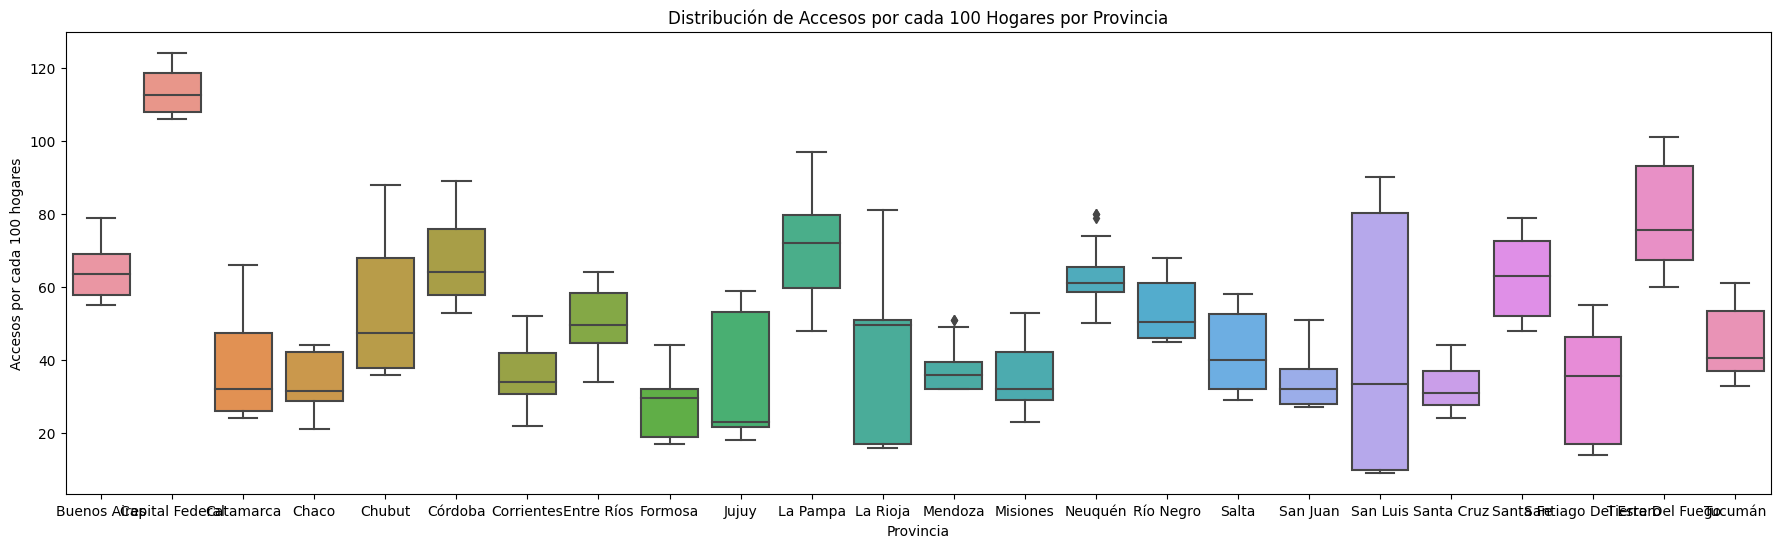

In [ ]:
plt.figure(figsize=(22, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=dfx1_eda)
plt.title('Distribución de Accesos por cada 100 Hogares por Provincia')
plt.show()

El gráfico de caja y bigotes (boxplot) proporciona información valiosa sobre la distribución de los "Accesos por cada 100 Hogares" en cada provincia. Aquí hay algunas observaciones y análisis que puedes realizar a partir de este gráfico:

**Centralidad de los Datos:**

La línea dentro de cada caja representa la mediana, proporcionando una medida de la centralidad de los datos en cada provincia. Puedes observar cómo varía la mediana entre provincias.

**Dispersión:**

La longitud de la caja muestra la dispersión intercuartílica (IQR), que indica la variabilidad en el 50% central de los datos. Provincias con cajas más largas tienen mayor variabilidad en los accesos por cada 100 hogares.

**Outliers:**

Los puntos fuera de las líneas de bigotes son considerados valores atípicos (outliers). Puedes identificar provincias con valores atípicos en la distribución de accesos.

**Comparación entre Provincias:**

Puedes comparar visualmente la distribución de accesos en diferentes provincias. Observa la altura de las cajas y la posición de las medianas.

**Provincias con Mayor y Menor Acceso:**

Las provincias con las medianas más altas y más bajas para entender cuáles tienen un mayor o menor acceso a Internet por cada 100 hogares.



# **XProvincia**

In [ ]:
len(dfx1_eda['Provincia'].unique())

24

In [ ]:
value_counts = dfx1_eda["Provincia"].value_counts()

In [ ]:
print(value_counts)

Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Corrientes             36
Córdoba                36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: Provincia, dtype: int64


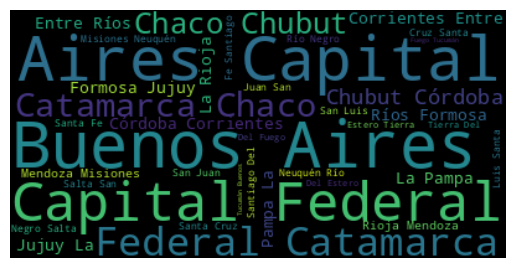

In [ ]:
# Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Convertimos todos los valores en la columna 'review' a cadenas de texto
text = " ".join(str(Provincia) for Provincia in dfx1_eda.Provincia)

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

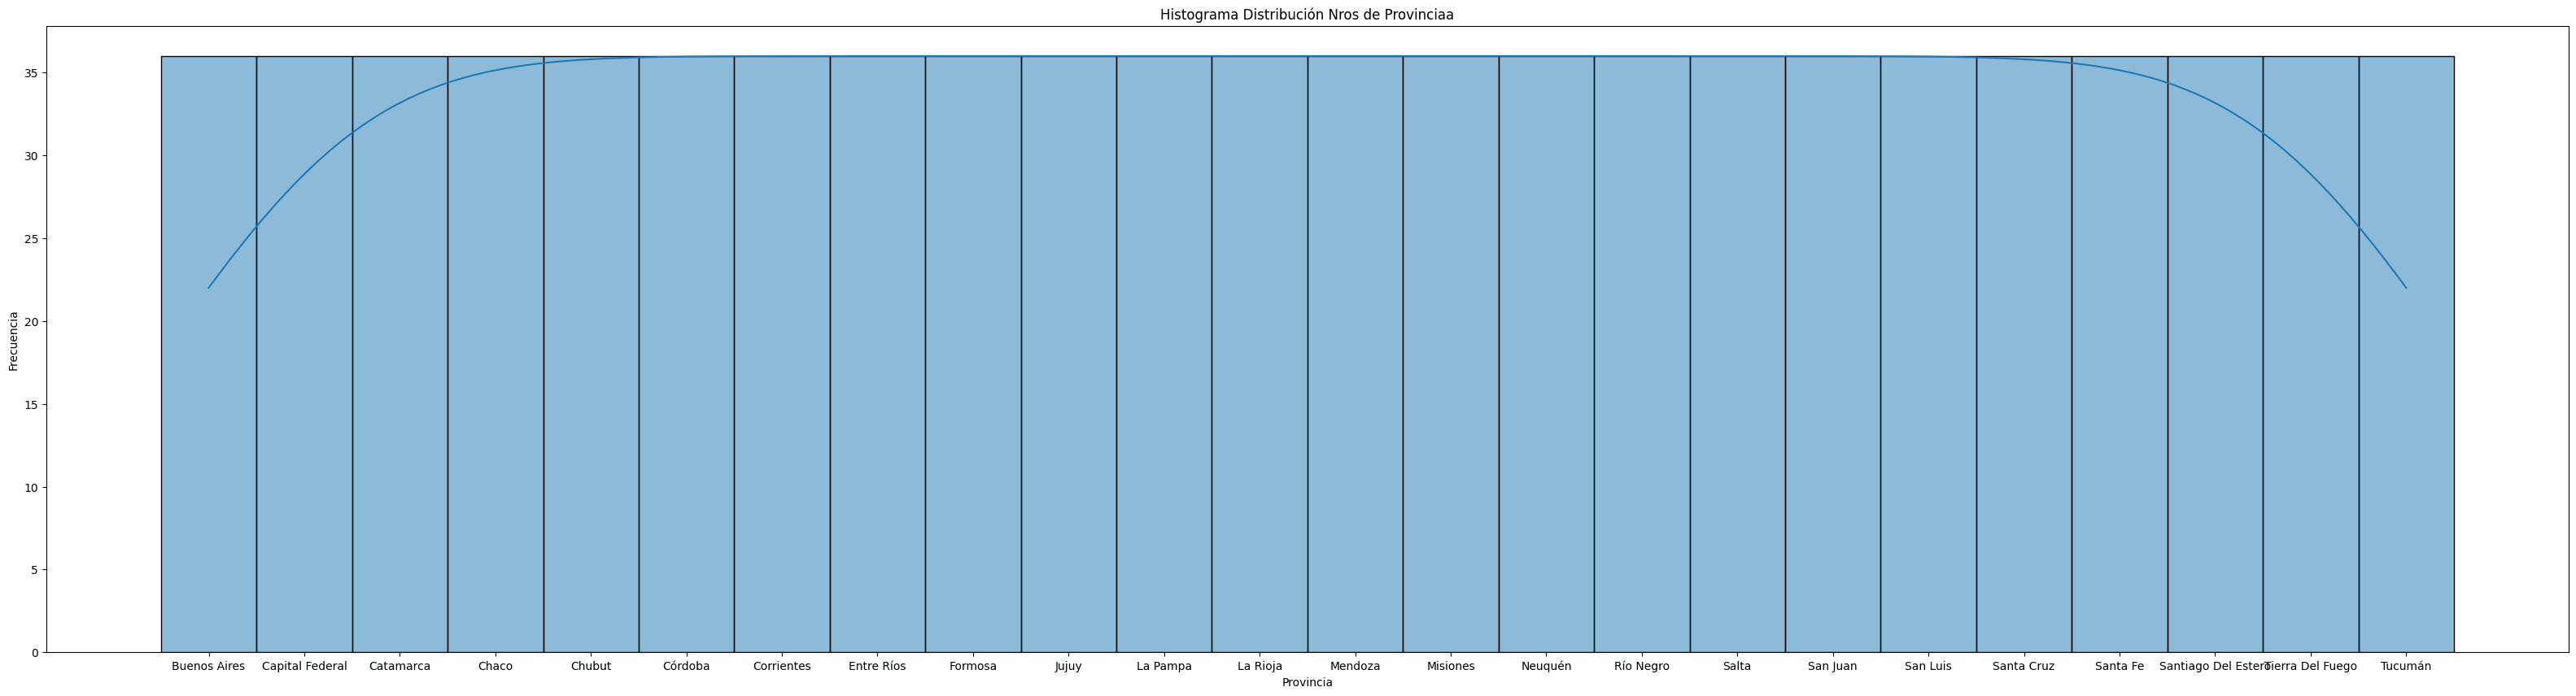

In [ ]:
plt.figure(figsize=(40, 10))
sns.histplot(dfx1_eda['Provincia'], bins=20, kde=True)
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.title('Histograma Distribución Nros de Provinciaa')
plt.show()

# **XAño**

In [ ]:
len(dfx1_eda['Año'].unique())

9

In [ ]:
value_counts = dfx1_eda["Año"].value_counts()

In [ ]:
print(value_counts)

2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
Name: Año, dtype: int64


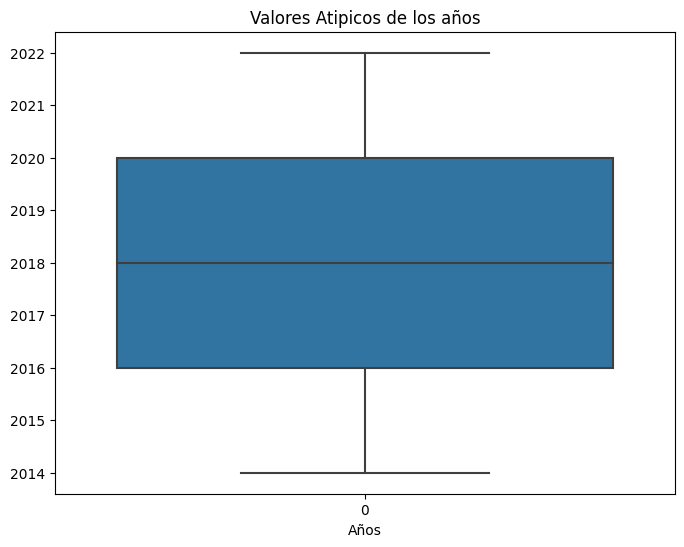

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(dfx1_eda['Año'])
plt.xlabel('Años')
plt.title('Valores Atipicos de los años')
plt.show()

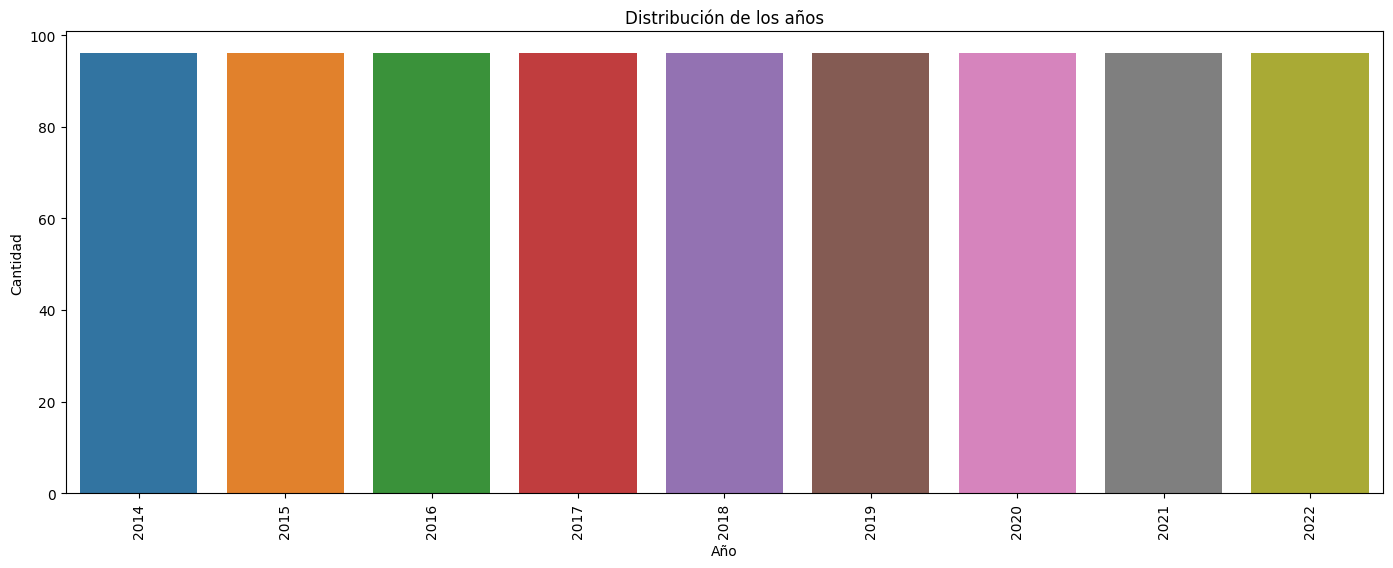

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx1_eda, x='Año')
plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de los años')
plt.show()

# ***XTrimestre***

In [ ]:
len(dfx1_eda['Trimestre'].unique())

4

In [ ]:
value_counts = dfx1_eda["Trimestre"].value_counts()

In [ ]:
print(value_counts)

4    216
3    216
2    216
1    216
Name: Trimestre, dtype: int64


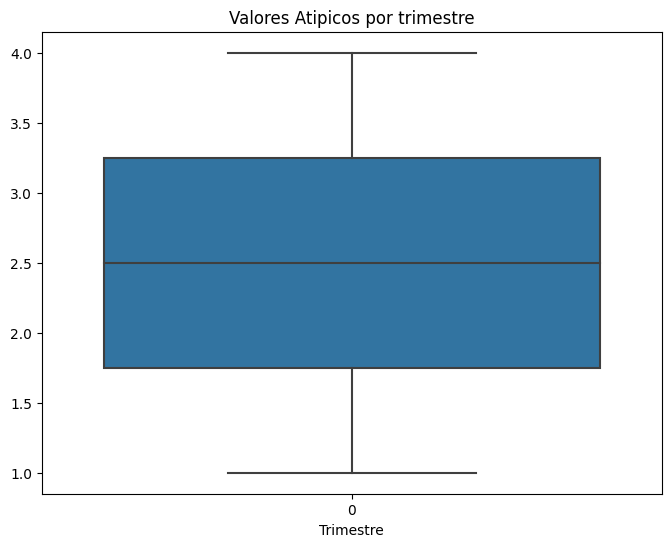

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(dfx1_eda['Trimestre'])
plt.xlabel('Trimestre')
plt.title('Valores Atipicos por trimestre')
plt.show()

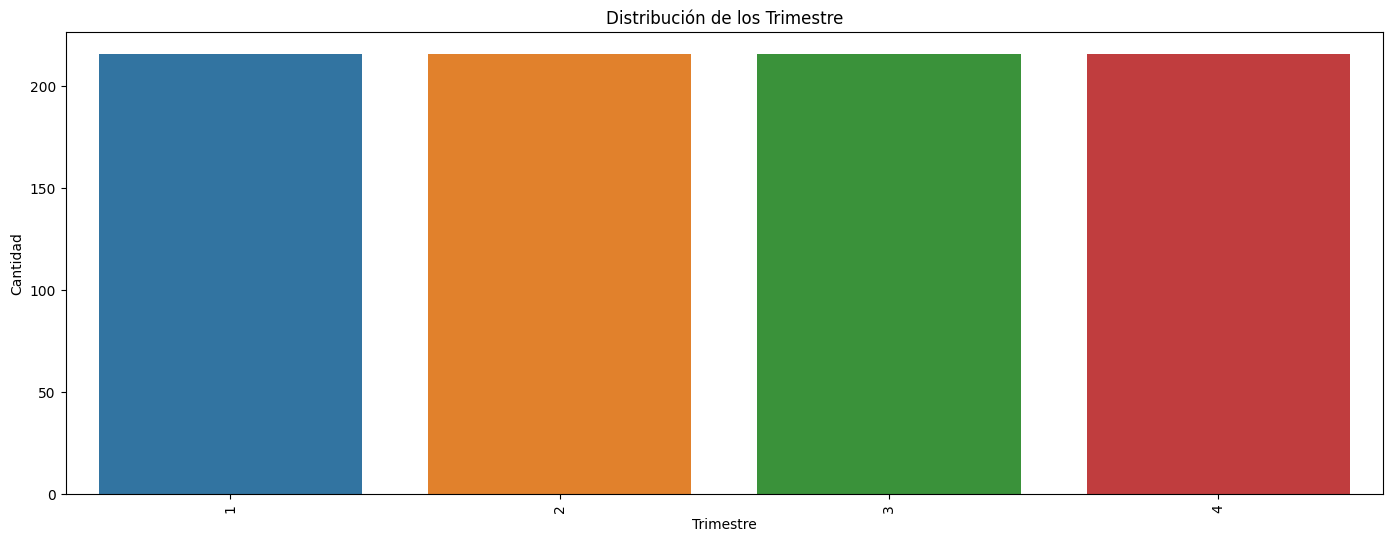

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx1_eda, x='Trimestre')
plt.xticks(rotation=90)
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.title('Distribución de los Trimestre')
plt.show()

# **XAccesos por cada 100 hogares**

In [ ]:
dfx1_eda.head(5)

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,0,2022,4,Buenos Aires,79
1,1,2022,4,Capital Federal,123
2,2,2022,4,Catamarca,66
3,3,2022,4,Chaco,44
4,4,2022,4,Chubut,86


In [ ]:
len(dfx1_eda['Accesos por cada 100 hogares'].unique())

106

In [ ]:
value_counts = dfx1_eda["Accesos por cada 100 hogares"].value_counts()

In [ ]:
print(value_counts)

32     29
33     24
30     21
36     20
56     19
       ..
107     1
94      1
109     1
96      1
9       1
Name: Accesos por cada 100 hogares, Length: 106, dtype: int64


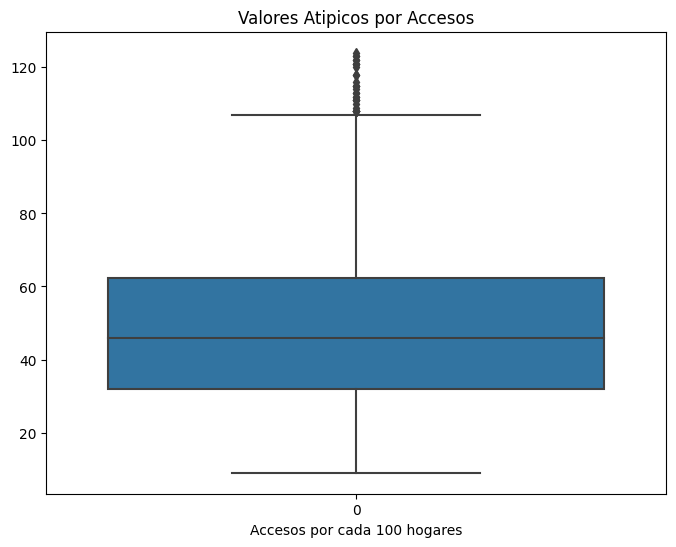

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(dfx1_eda['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Valores Atipicos por Accesos')
plt.show()

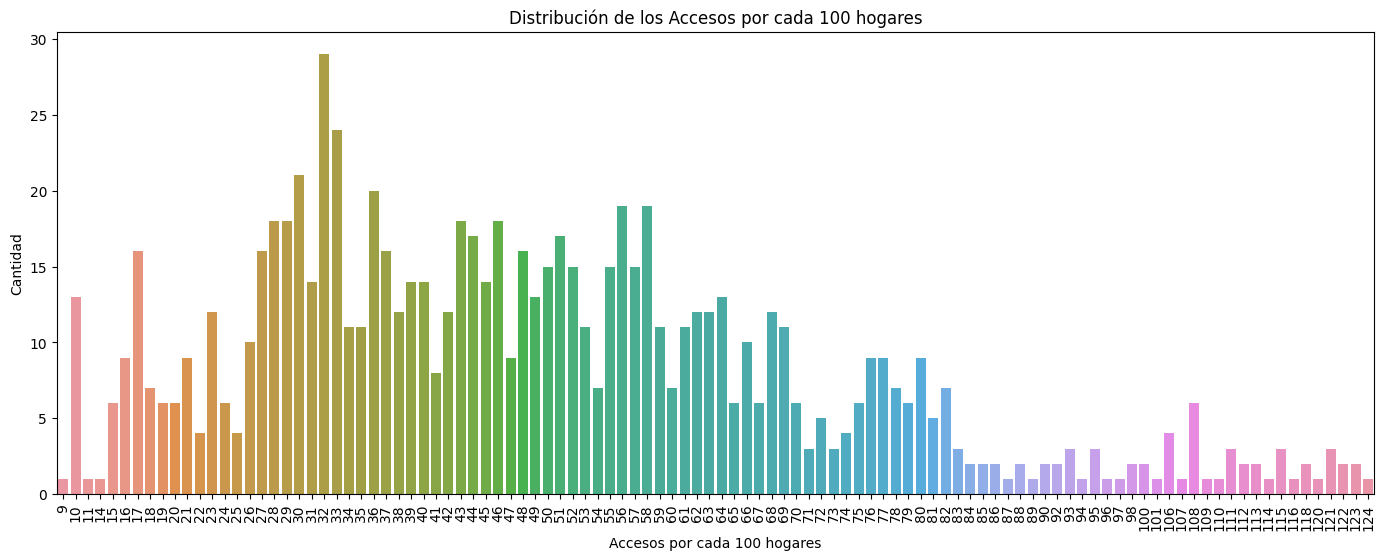

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx1_eda, x='Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Cantidad')
plt.title('Distribución de los Accesos por cada 100 hogares')
plt.show()

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////



---





---



# **EDA - Analisis Exploratorio de Datos- Penetracion_hogares_nacional_internet_fijo**

In [ ]:
dfx2_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx2_penetracion_hogares_nacional_internet_fijo.csv')


In [ ]:
dfx2_eda.shape

(36, 6)

In [ ]:
dfx2_eda.head(3)

,Unnamed: 0,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,0,2022,4,"77,21","24,15",Oct-Dic 2022
1,1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2,2022,2,"75,97","23,72",Abr-Jun 2022


# **Exploración de Variables Categoricas y Numericas**

# **XAño**

In [ ]:
len(dfx2_eda['Año'].unique())

9

In [ ]:
value_counts = dfx2_eda["Año"].value_counts()

In [ ]:
print(value_counts)

2022    4
2021    4
2020    4
2019    4
2018    4
2017    4
2016    4
2015    4
2014    4
Name: Año, dtype: int64


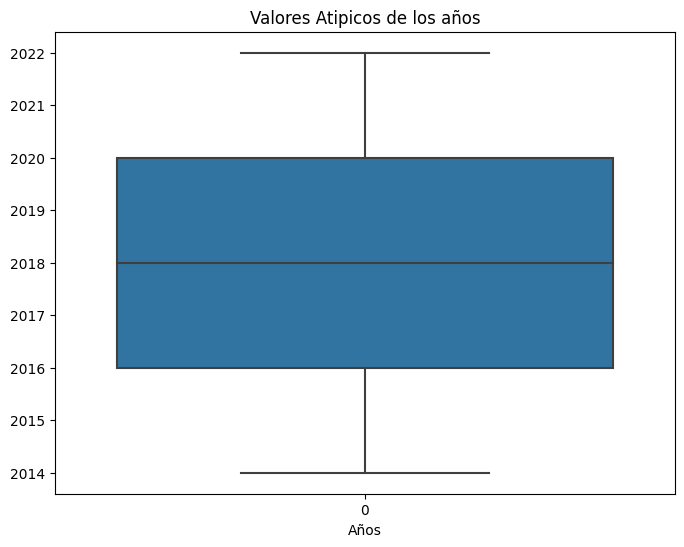

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(dfx2_eda['Año'])
plt.xlabel('Años')
plt.title('Valores Atipicos de los años')
plt.show()

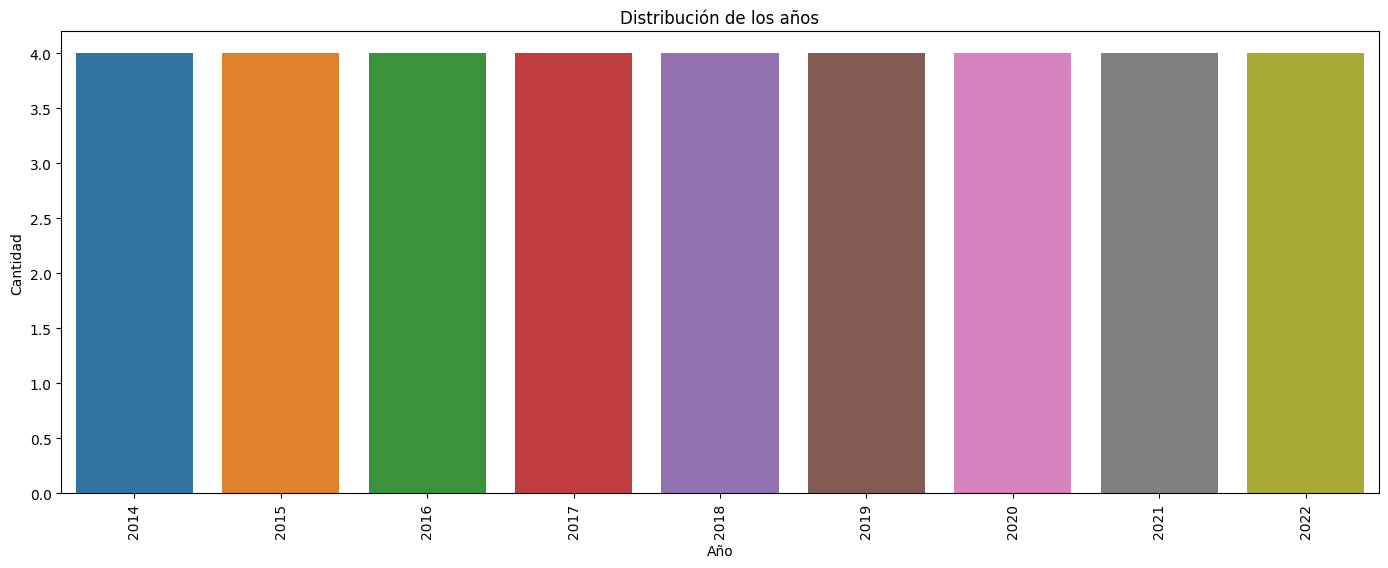

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx2_eda, x='Año')
plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de los años')
plt.show()

# ***XTrimestre***

In [ ]:
len(dfx2_eda['Trimestre'].unique())

4

In [ ]:
value_counts = dfx2_eda["Trimestre"].value_counts()

In [ ]:
print(value_counts)

4    9
3    9
2    9
1    9
Name: Trimestre, dtype: int64


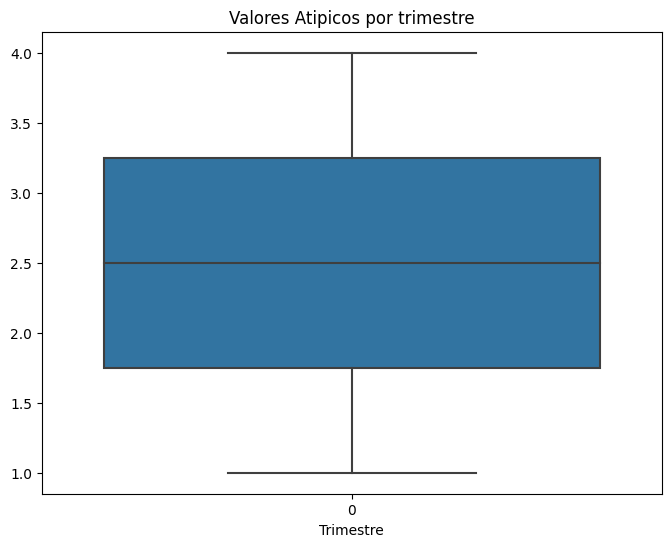

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(dfx2_eda['Trimestre'])
plt.xlabel('Trimestre')
plt.title('Valores Atipicos por trimestre')
plt.show()

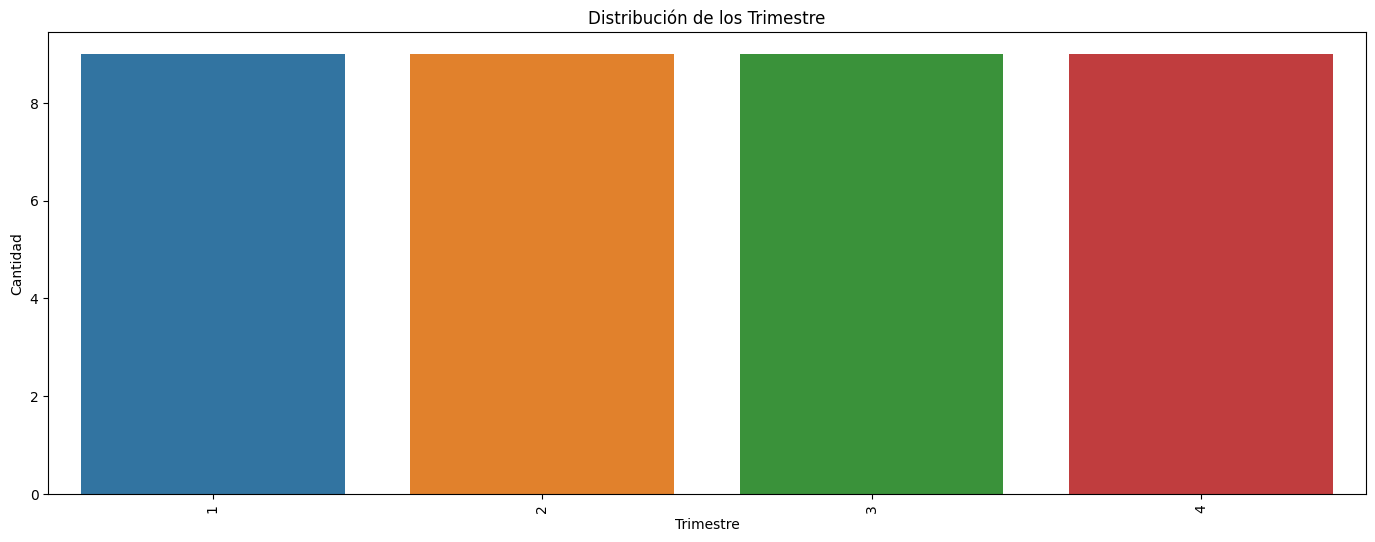

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx2_eda, x='Trimestre')
plt.xticks(rotation=90)
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.title('Distribución de los Trimestre')
plt.show()

# **XAccesos por cada 100 hogares**

In [ ]:
dfx2_eda.head(5)

,Unnamed: 0,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,0,2022,4,"77,21","24,15",Oct-Dic 2022
1,1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2,2022,2,"75,97","23,72",Abr-Jun 2022
3,3,2022,1,"73,88","23,05",Ene-Mar 2022
4,4,2021,4,"73,18","22,81",Oct-Dic 2021


In [ ]:
len(dfx2_eda['Accesos por cada 100 hogares'].unique())

36

In [ ]:
value_counts = dfx2_eda["Accesos por cada 100 hogares"].value_counts()

In [ ]:
print(value_counts)

77,21    1
76,64    1
57,78    1
56,90    1
54,90    1
54,16    1
53,94    1
53,73    1
53,34    1
51,85    1
52,63    1
52,46    1
51,76    1
51,36    1
50,50    1
50,67    1
49,86    1
58,82    1
59,16    1
60,69    1
67,62    1
75,97    1
73,88    1
73,18    1
70,58    1
69,24    1
67,95    1
66,31    1
61,42    1
64,21    1
62,86    1
62,92    1
65,79    1
64,53    1
62,48    1
49,55    1
Name: Accesos por cada 100 hogares, dtype: int64


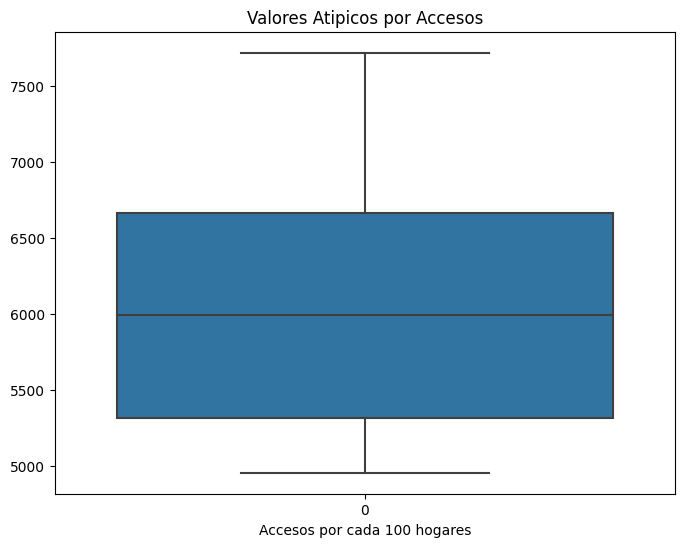

In [ ]:

dfx2_eda['Accesos por cada 100 hogares'] = dfx2_eda['Accesos por cada 100 hogares'].str.replace(',', '').astype(float)


plt.figure(figsize=(8, 6))
sns.boxplot(dfx2_eda['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Valores Atipicos por Accesos')
plt.show()


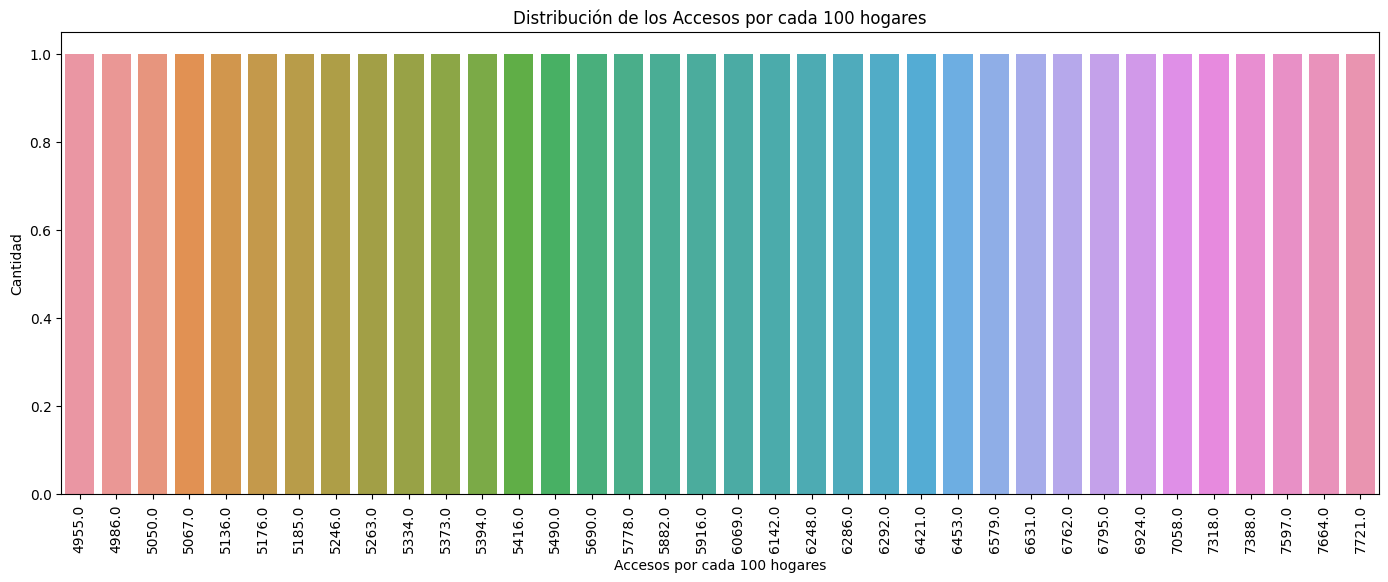

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx2_eda, x='Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Cantidad')
plt.title('Distribución de los Accesos por cada 100 hogares')
plt.show()

# **Accesos por cada 100 hab**

In [ ]:
dfx2_eda.head(5)

,Unnamed: 0,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,0,2022,4,"77,21","24,15",Oct-Dic 2022
1,1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2,2022,2,"75,97","23,72",Abr-Jun 2022
3,3,2022,1,"73,88","23,05",Ene-Mar 2022
4,4,2021,4,"73,18","22,81",Oct-Dic 2021


In [ ]:
len(dfx2_eda['Accesos por cada 100 hab'].unique())

36

In [ ]:
value_counts = dfx2_eda["Accesos por cada 100 hab"].value_counts()

In [ ]:
print(value_counts)

24,15    1
23,95    1
17,79    1
17,51    1
16,88    1
16,64    1
16,56    1
16,50    1
16,37    1
15,90    1
16,12    1
16,05    1
15,82    1
15,68    1
15,39    1
15,43    1
15,16    1
18,12    1
18,24    1
18,73    1
21,01    1
23,72    1
23,05    1
22,81    1
21,98    1
21,55    1
21,13    1
20,59    1
18,97    1
19,92    1
19,48    1
19,49    1
20,36    1
19,96    1
19,31    1
15,05    1
Name: Accesos por cada 100 hab, dtype: int64


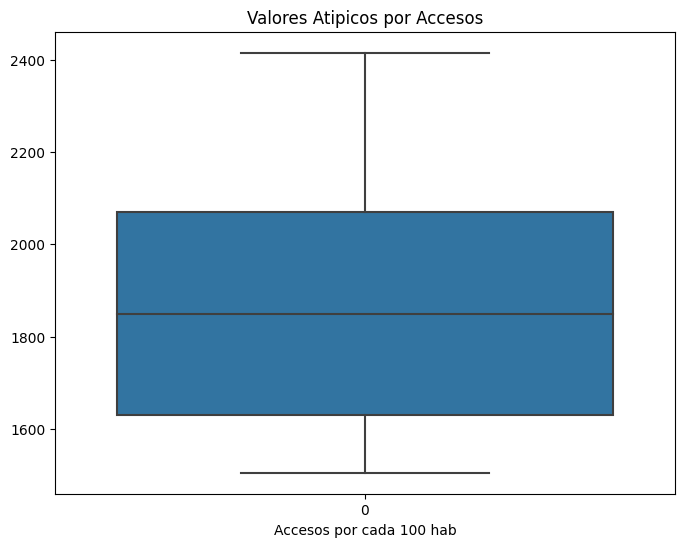

In [ ]:

dfx2_eda['Accesos por cada 100 hab'] = dfx2_eda['Accesos por cada 100 hab'].str.replace(',', '').astype(float)


plt.figure(figsize=(8, 6))
sns.boxplot(dfx2_eda['Accesos por cada 100 hab'])
plt.xlabel('Accesos por cada 100 hab')
plt.title('Valores Atipicos por Accesos')
plt.show()


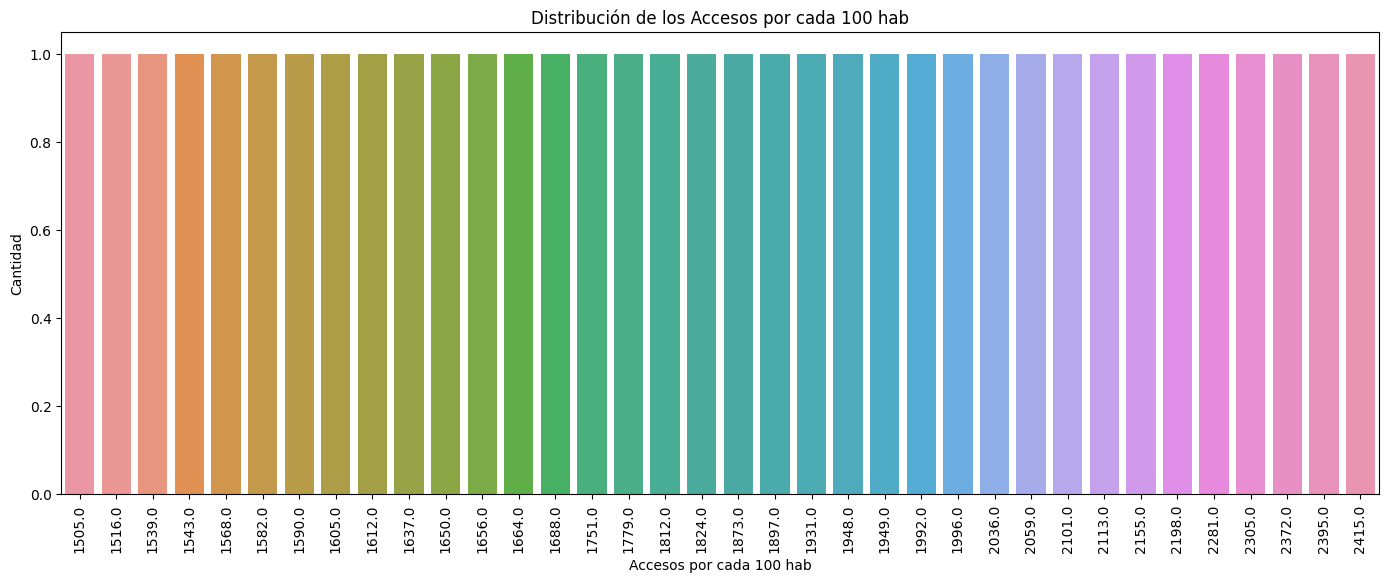

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx2_eda, x='Accesos por cada 100 hab')
plt.xticks(rotation=90)
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Cantidad')
plt.title('Distribución de los Accesos por cada 100 hab')
plt.show()

# **Periodo**

In [ ]:
len(dfx2_eda['Periodo'].unique())

36

In [ ]:
value_counts = dfx2_eda["Periodo"].value_counts()

In [ ]:
print(value_counts)

Oct-Dic 2022     1
Jul-Sept 2022    1
Oct-Dic 2017     1
Jul-Sept 2017    1
Abr-Jun 2017     1
Ene-Mar 2017     1
Oct-Dic 2016     1
Jul-Sept 2016    1
Abr-Jun 2016     1
Ene-Mar 2016     1
Oct-Dic 2015     1
Jul-Sept 2015    1
Abr-Jun 2015     1
Ene-Mar 2015     1
Oct-Dic 2014     1
Jul-Sept 2014    1
Abr-Jun 2014     1
Ene-Mar 2018     1
Abr-Jun 2018     1
Jul-Sept 2018    1
Oct-Dic 2020     1
Abr-Jun 2022     1
Ene-Mar 2022     1
Oct-Dic 2021     1
Jul-Sept 2021    1
Abr-Jun 2021     1
Ene-Mar 2021     1
Jul-Sept 2020    1
Oct-Dic 2018     1
Abr-Jun 2020     1
Ene-Mar 2020     1
Oct-Dic 2019     1
Jul-Sept 2019    1
Abr-Jun 2019     1
Ene-Mar 2019     1
Ene-Mar 2014     1
Name: Periodo, dtype: int64


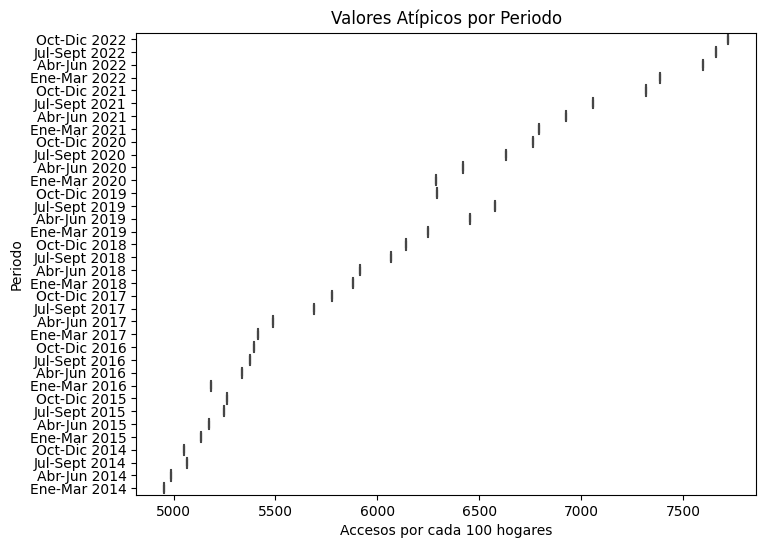

In [ ]:


plt.figure(figsize=(8, 6))
sns.boxplot(y='Periodo', x='Accesos por cada 100 hogares', data=dfx2_eda)
plt.ylabel('Periodo')
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Valores Atípicos por Periodo')
plt.show()


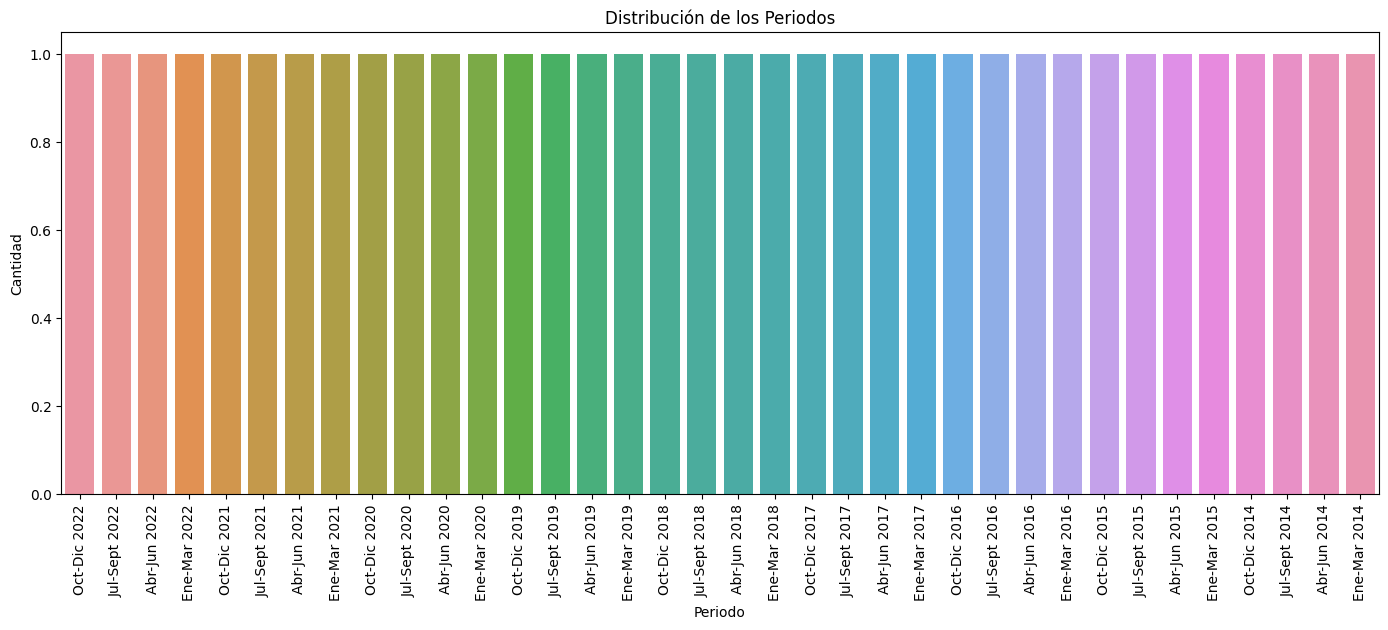

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=dfx2_eda, x='Periodo')
plt.xticks(rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Cantidad')
plt.title('Distribución de los Periodos')
plt.show()

# **EDA - Total nacional de accesos a Internet fijo por banda ancha y banda angosta**

In [ ]:
dfx3_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx3_Total_nacional_de_accesos_Internet_fijo_por_banda_ancha_y_banda_angosta.csv')


In [ ]:
dfx3_eda.head(3)

,Unnamed: 0,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,0,2022,4,11,12,11,Oct-Dic 2022
1,1,2022,3,11,12,11,Jul-Sept 2022
2,2,2022,2,11,12,11,Abr-Jun 2022


**Gráfico de dispersión para visualizar la relación entre dos variables, como 'Banda ancha fija' y 'Dial up'. Esto te permitirá ver si hay alguna relación lineal o patrón entre estas dos variables.**

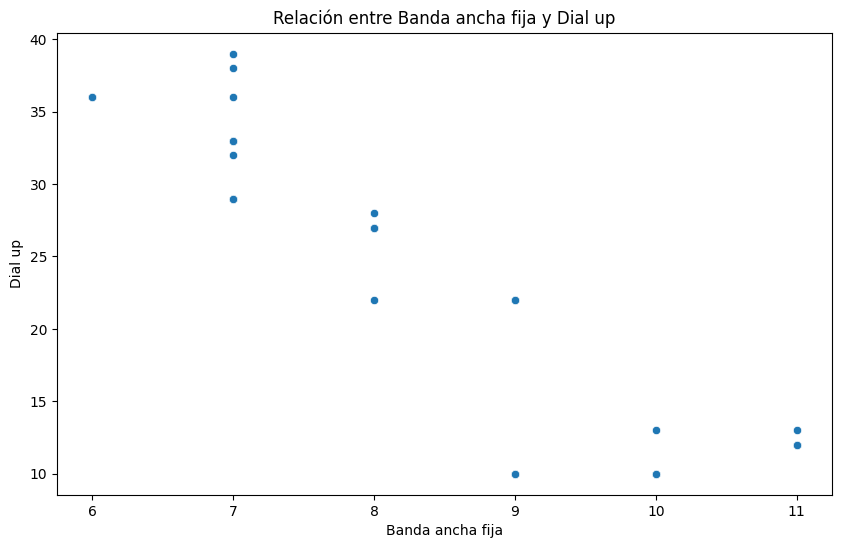

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Banda ancha fija', y='Dial up', data=dfx3_eda)
plt.title('Relación entre Banda ancha fija y Dial up')
plt.show()

**Estadísticas Descriptivas**

In [ ]:
# Estadísticas descriptivas
print(dfx3_eda[['Banda ancha fija', 'Dial up']].describe())


       Banda ancha fija    Dial up
count         36.000000  36.000000
mean           8.361111  23.083333
std            1.495761  10.171037
min            6.000000  10.000000
25%            7.000000  12.000000
50%            8.000000  27.000000
75%            9.250000  32.250000
max           11.000000  39.000000


**Visualización Temporal**

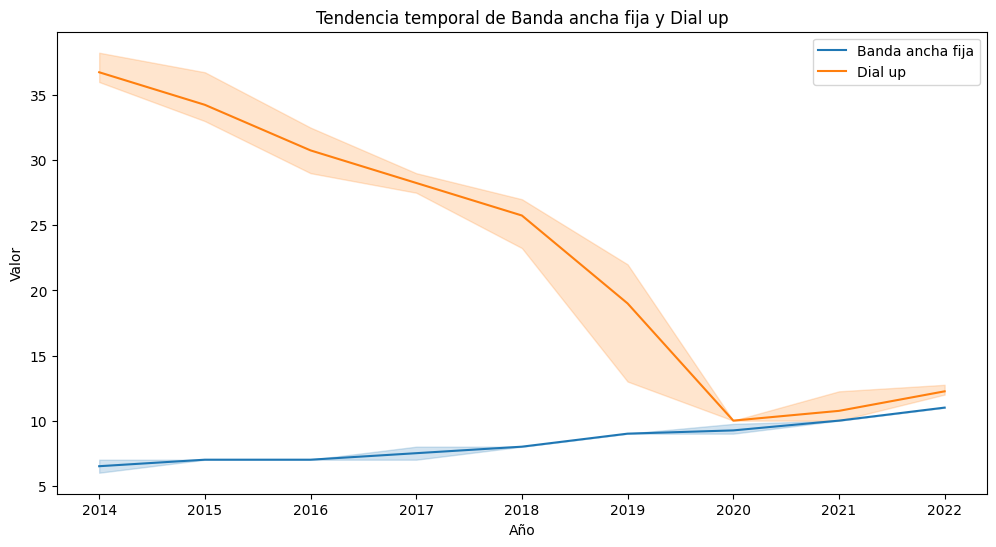

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Banda ancha fija', data=dfx3_eda, label='Banda ancha fija')
sns.lineplot(x='Año', y='Dial up', data=dfx3_eda, label='Dial up')
plt.title('Tendencia temporal de Banda ancha fija y Dial up')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.show()

**Análisis entre Año, Banda ancha fija y Dial up**

***En este gráfico de dispersión, se compara la banda ancha fija con el dial up a lo largo de los años. El color de los puntos representa la variable 'Dial up'.***

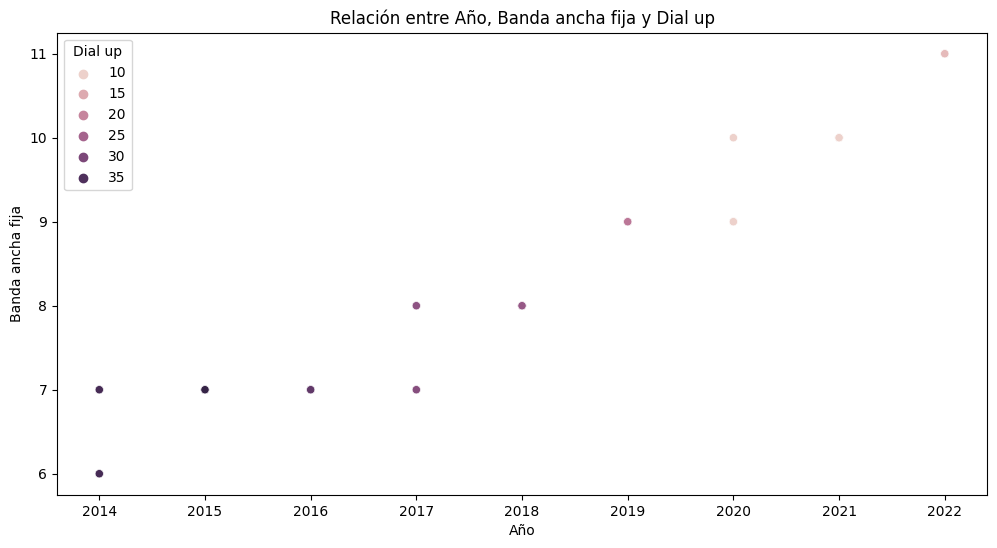

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Año', y='Banda ancha fija', hue='Dial up', data=dfx3_eda)
plt.title('Relación entre Año, Banda ancha fija y Dial up')
plt.show()

**Análisis entre Año y Total**

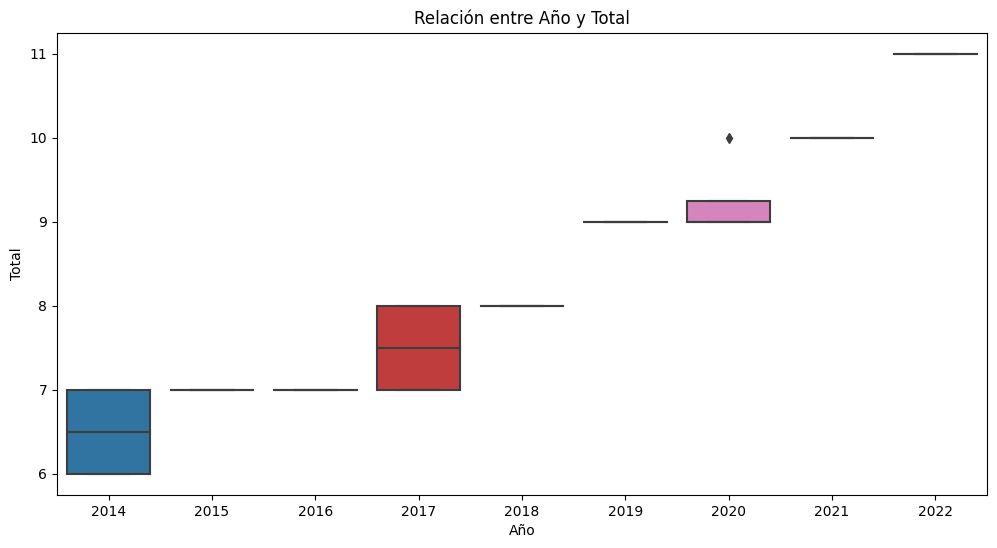

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Total', data=dfx3_eda)
plt.title('Relación entre Año y Total')
plt.show()

**Agrupación y Resumen Estadístico**

In [ ]:
# Agrupar por Trimestre
grupo_trimestral = dfx3_eda.groupby('Trimestre')

# Calcular estadísticas descriptivas para cada grupo
estadisticas_trimestrales = grupo_trimestral[['Banda ancha fija', 'Dial up', 'Total']].describe()

# Mostrar el resumen
print(estadisticas_trimestrales)


          Banda ancha fija                                                 \
                     count      mean       std  min  25%  50%   75%   max   
Trimestre                                                                   
1                      9.0  8.222222  1.641476  6.0  7.0  8.0   9.0  11.0   
2                      9.0  8.222222  1.641476  6.0  7.0  8.0   9.0  11.0   
3                      9.0  8.444444  1.424001  7.0  7.0  8.0   9.0  11.0   
4                      9.0  8.555556  1.509231  7.0  7.0  8.0  10.0  11.0   

          Dial up             ...             Total                           \
            count       mean  ...   75%   max count      mean       std  min   
Trimestre                     ...                                              
1             9.0  24.222222  ...  33.0  38.0   9.0  8.222222  1.641476  6.0   
2             9.0  23.444444  ...  32.0  36.0   9.0  8.222222  1.641476  6.0   
3             9.0  23.000000  ...  29.0  36.0   9.0  8.44444

# **EDA - Accesos_a_banda_ancha_y_banda_angosta_por_provincia**

In [ ]:
dfx4_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx4_Accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv')



In [ ]:
dfx4_eda.head(4)

,Unnamed: 0,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,0,2022,4,Buenos Aires,5,6.0,5
1,1,2022,4,Capital Federal,2,2.0,2
2,2,2022,4,Catamarca,71,1.0,71
3,3,2022,4,Chaco,144,5.0,144


**Visualizaciones y Análisis Gráfico**

*Histogramas y Boxplots para Banda ancha fija, Dial up y Total por Provincia*

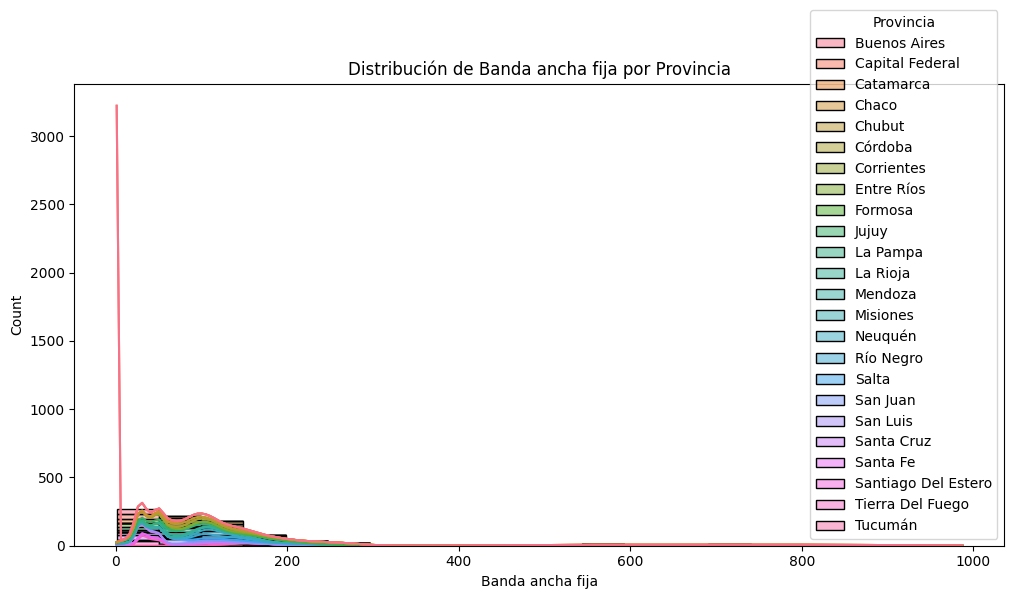

In [ ]:
# Histograma y Boxplot para Banda ancha fija por Provincia
plt.figure(figsize=(12, 6))
sns.histplot(data=dfx4_eda, x='Banda ancha fija', hue='Provincia', multiple='stack', bins=20, kde=True)
plt.title('Distribución de Banda ancha fija por Provincia')
plt.show()

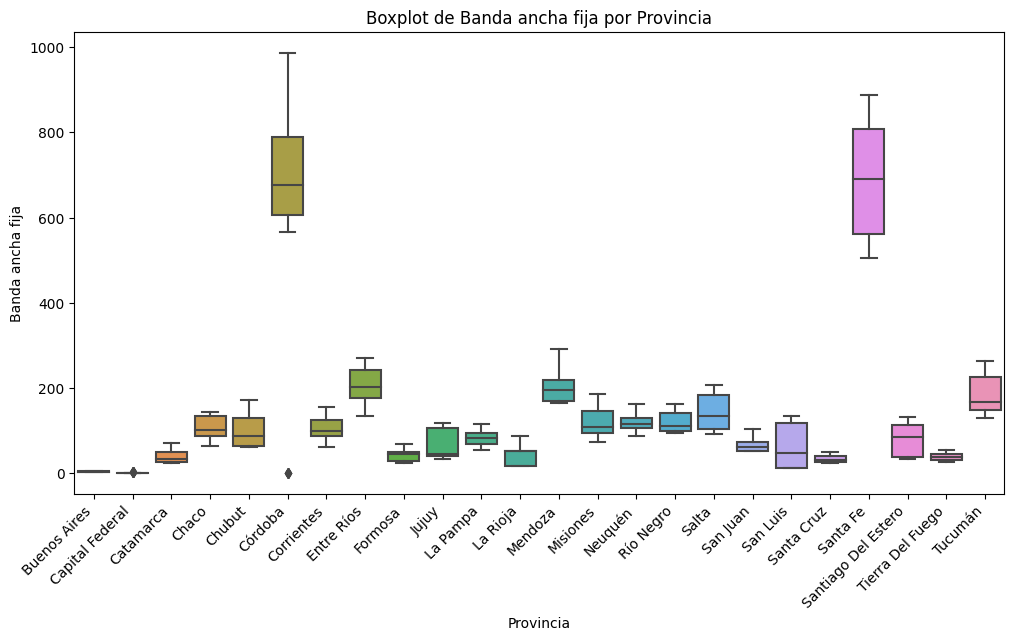

In [ ]:
# Boxplot para Banda ancha fija por Provincia
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfx4_eda, x='Provincia', y='Banda ancha fija')
plt.title('Boxplot de Banda ancha fija por Provincia')
plt.xticks(rotation=45, ha='right')
plt.show()

**Matriz de correlacion**

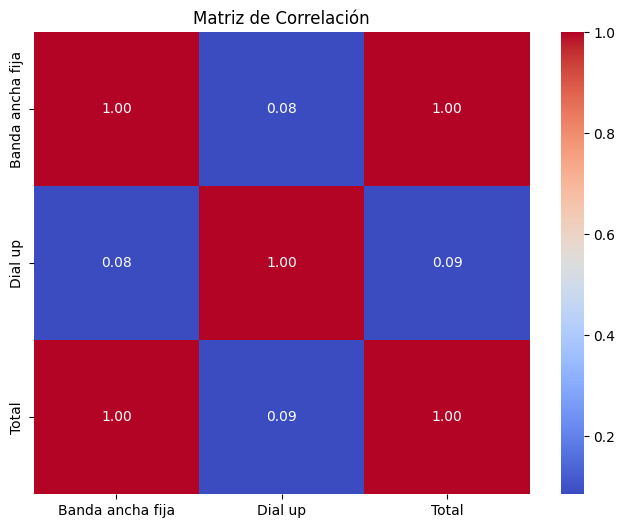

In [ ]:

correlation_matrix = dfx4_eda[['Banda ancha fija', 'Dial up', 'Total']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Estadísticas descriptivas por Provincia
estadisticas_por_provincia = dfx4_eda.groupby('Provincia')[['Banda ancha fija', 'Dial up', 'Total']].describe()

# Mostrar el resumen
print(estadisticas_por_provincia)


                    Banda ancha fija                                         \
                               count        mean         std    min     25%   
Provincia                                                                     
Buenos Aires                    36.0    3.638889    0.723198    3.0    3.00   
Capital Federal                 36.0    1.166667    0.377964    1.0    1.00   
Catamarca                       36.0   38.388889   14.687755   24.0   26.00   
Chaco                           36.0  106.250000   26.543092   63.0   87.75   
Chubut                          36.0   97.083333   37.269961   62.0   62.75   
Corrientes                      36.0  103.694444   25.125763   62.0   86.75   
Córdoba                         36.0  644.444444  257.802410    1.0  606.75   
Entre Ríos                      36.0  208.861111   42.946580  134.0  177.25   
Formosa                         35.0   40.428571   13.032281   25.0   28.00   
Jujuy                           36.0   70.138889   3

# **EDA - Internet_fijo_por_tecnología**

In [ ]:
dfx5_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx5_Internet_fijo_por_tecnología.csv')


In [ ]:
dfx5_eda.head(3)

,Unnamed: 0,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2,2022,2,1,6,3,556,232,11,Abr-Jun 2022


**Estadísticas Descriptivas**

*Esto te proporcionará estadísticas descriptivas generales y también desglosadas por año y trimestre.*

In [ ]:
estadisticas_generales = dfx5_eda.describe()


estadisticas_por_tiempo = dfx5_eda.groupby(['Año', 'Trimestre']).describe()


print(estadisticas_generales)
print(estadisticas_por_tiempo)


       Unnamed: 0          Año  Trimestre       ADSL  Cablemodem  \
count   36.000000    36.000000  36.000000  36.000000   36.000000   
mean    17.500000  2018.000000   2.500000   3.083333    4.166667   
std     10.535654     2.618615   1.133893   1.079021    1.253566   
min      0.000000  2014.000000   1.000000   1.000000    2.000000   
25%      8.750000  2016.000000   1.750000   2.000000    3.000000   
50%     17.500000  2018.000000   2.500000   4.000000    4.000000   
75%     26.250000  2020.000000   3.250000   4.000000    5.000000   
max     35.000000  2022.000000   4.000000   4.000000    6.000000   

       Fibra óptica    Wireless       Otros      Total  
count     36.000000   36.000000   36.000000  36.000000  
mean     193.361111  257.222222  149.500000   8.361111  
std      239.714968  180.185319   85.497034   1.495761  
min        1.000000   71.000000   54.000000   6.000000  
25%        2.750000   85.000000   64.250000   7.000000  
50%      159.000000  220.000000  116.500000  

**Visualizaciones**

**Histogramas y Boxplots para cada tipo de conexión**

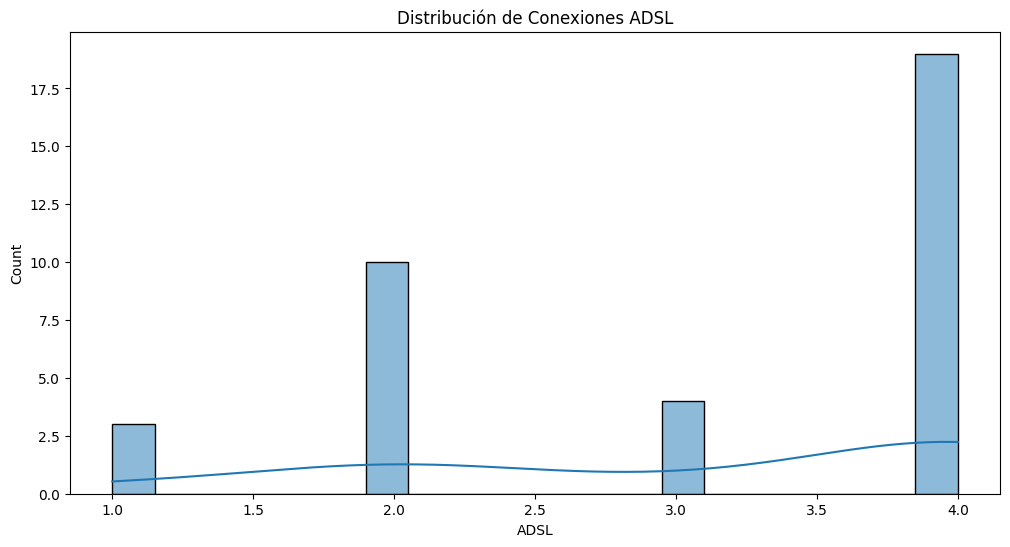

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfx5_eda, x='ADSL', bins=20, kde=True)
plt.title('Distribución de Conexiones ADSL')
plt.show()

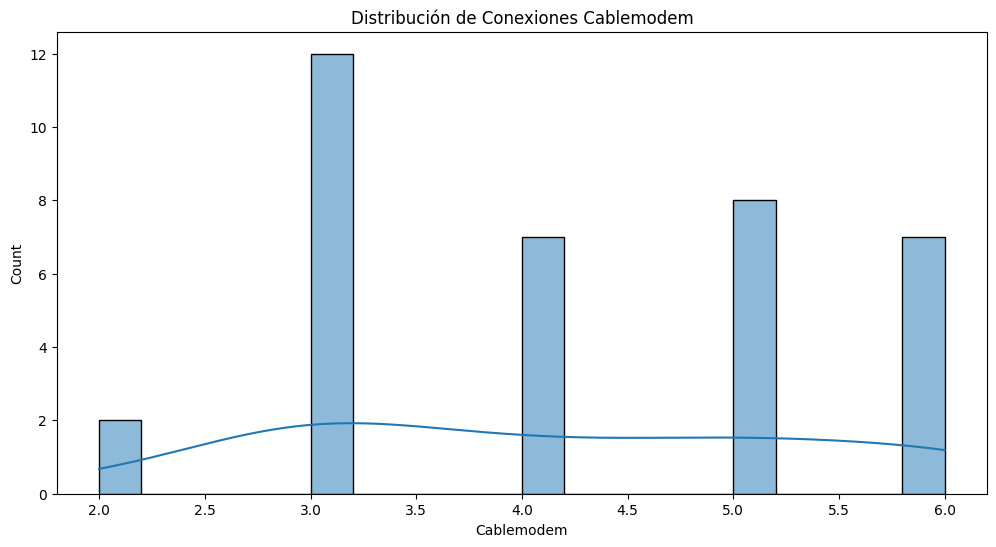

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfx5_eda, x='Cablemodem', bins=20, kde=True)
plt.title('Distribución de Conexiones Cablemodem')
plt.show()

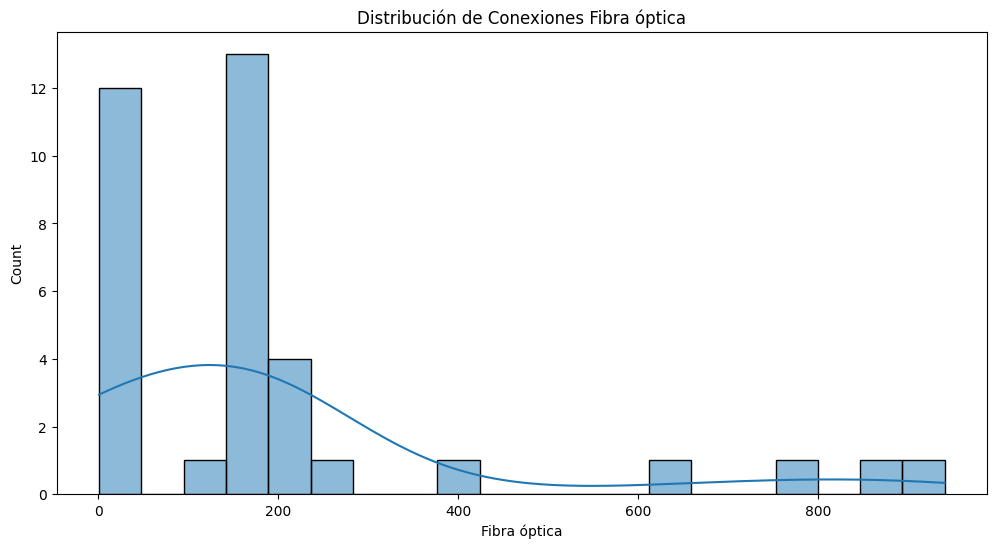

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfx5_eda, x='Fibra óptica', bins=20, kde=True)
plt.title('Distribución de Conexiones Fibra óptica')
plt.show()

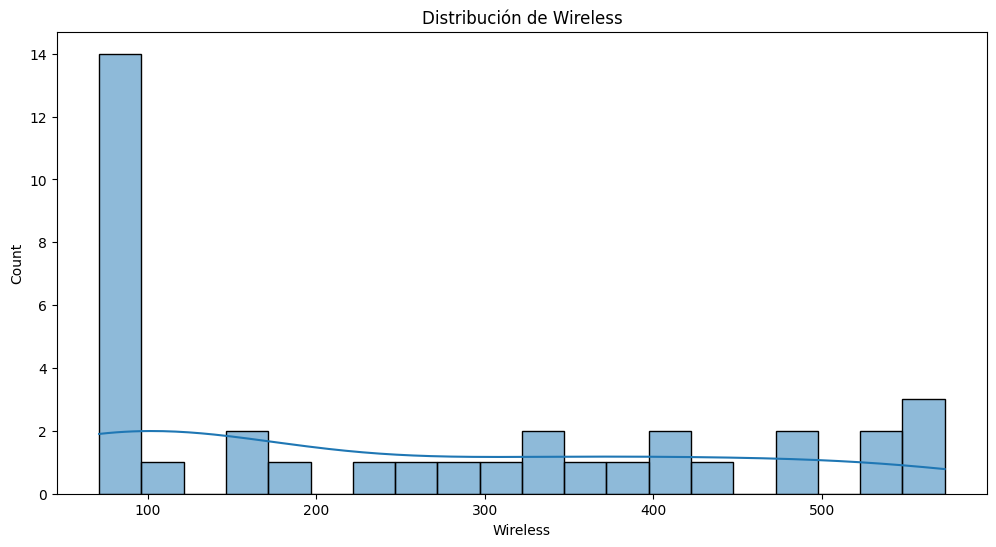

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfx5_eda, x='Wireless', bins=20, kde=True)
plt.title('Distribución de Wireless')
plt.show()

**Matriz de Correlación**

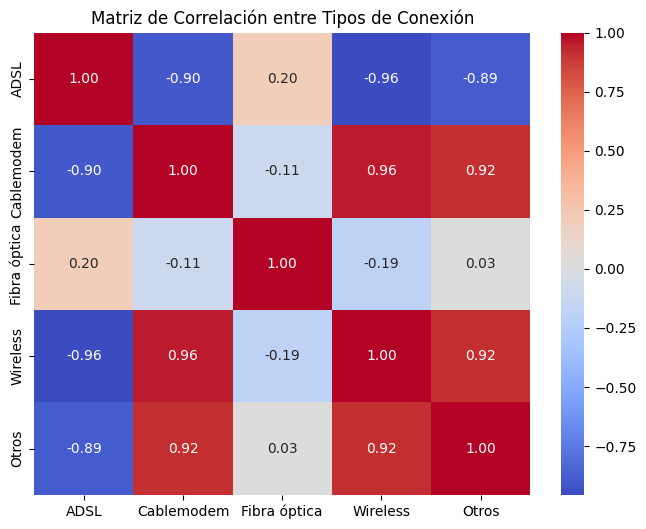

In [ ]:
correlation_matrix = dfx5_eda[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Tipos de Conexión')
plt.show()

In [ ]:
dfx5_eda.head(2)

,Unnamed: 0,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,1,2022,3,1,6,3,557,235,11,Jul-Sept 2022


# **EDA - Acceso_a_Internet_fijo_por_tecnología_y_provincia**

In [ ]:
dfx6_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx6_Acceso_a_Internet_fijo_por_tecnología_y_provincia.csv')


In [ ]:
dfx6_eda.head(3)

,Unnamed: 0,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0


**Estadísticas Descriptivas**

In [ ]:

estadisticas_generales = dfx6_eda.describe()
estadisticas_por_tiempo_provincia = dfx6_eda.groupby(['Año', 'Trimestre', 'Provincia']).describe()

print(estadisticas_generales)
print(estadisticas_por_tiempo_provincia)


       Unnamed: 0        ADSL  Cablemodem  Fibra óptica    Wireless  \
count  864.000000  864.000000  864.000000    864.000000  864.000000   
mean   431.500000   86.363426  103.291667    165.432870   57.777778   
std    249.559612  116.431490  188.849172    266.807807  156.015038   
min      0.000000    1.000000    0.000000      0.000000    0.000000   
25%    215.750000   21.000000    9.000000      9.000000    4.000000   
50%    431.500000   46.000000   35.500000     25.000000   10.000000   
75%    647.250000   81.000000   72.250000    170.750000   26.000000   
max    863.000000  720.000000  999.000000    998.000000  952.000000   

            Otros       Total  
count  864.000000  864.000000  
mean   102.712963  137.636574  
std    207.418981  180.798813  
min      1.000000    1.000000  
25%      3.000000   39.750000  
50%     15.000000   91.000000  
75%     47.000000  143.250000  
max    987.000000  987.000000  
                                   Unnamed: 0                           

**Histogramas y Boxplots para cada tipo de conexión por Provincia**

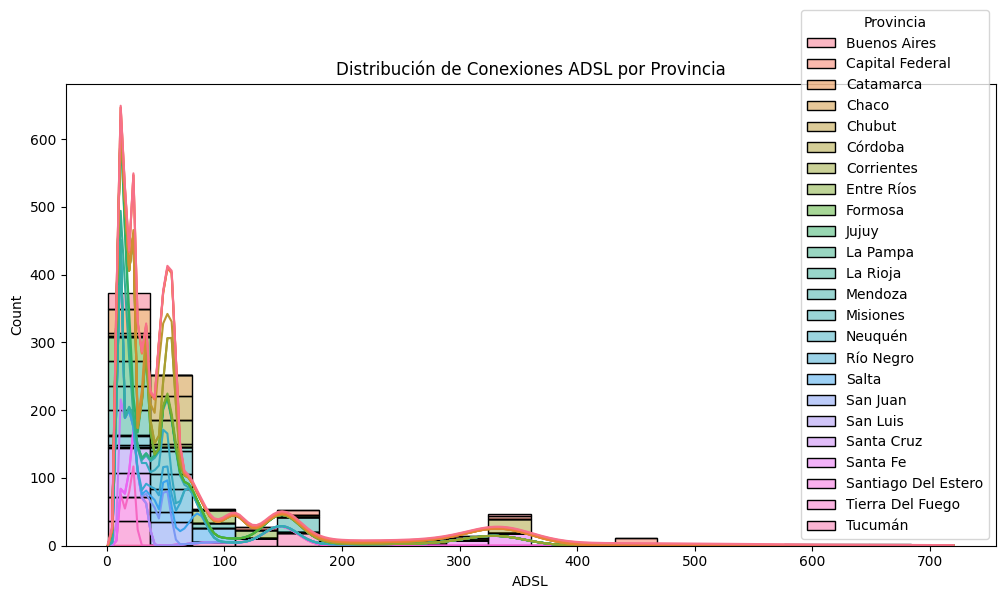

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfx6_eda, x='ADSL', hue='Provincia', multiple='stack', bins=20, kde=True)
plt.title('Distribución de Conexiones ADSL por Provincia')
plt.show()

**Matriz de Correlación**

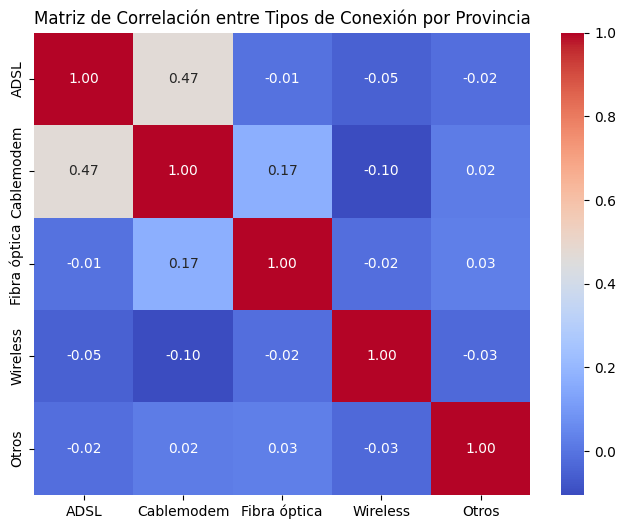

In [ ]:
correlation_matrix = dfx6_eda[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Tipos de Conexión por Provincia')
plt.show()

**Gráfico de Barras Agrupadas**

<ipython-input-40-e2fac3d78d12>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




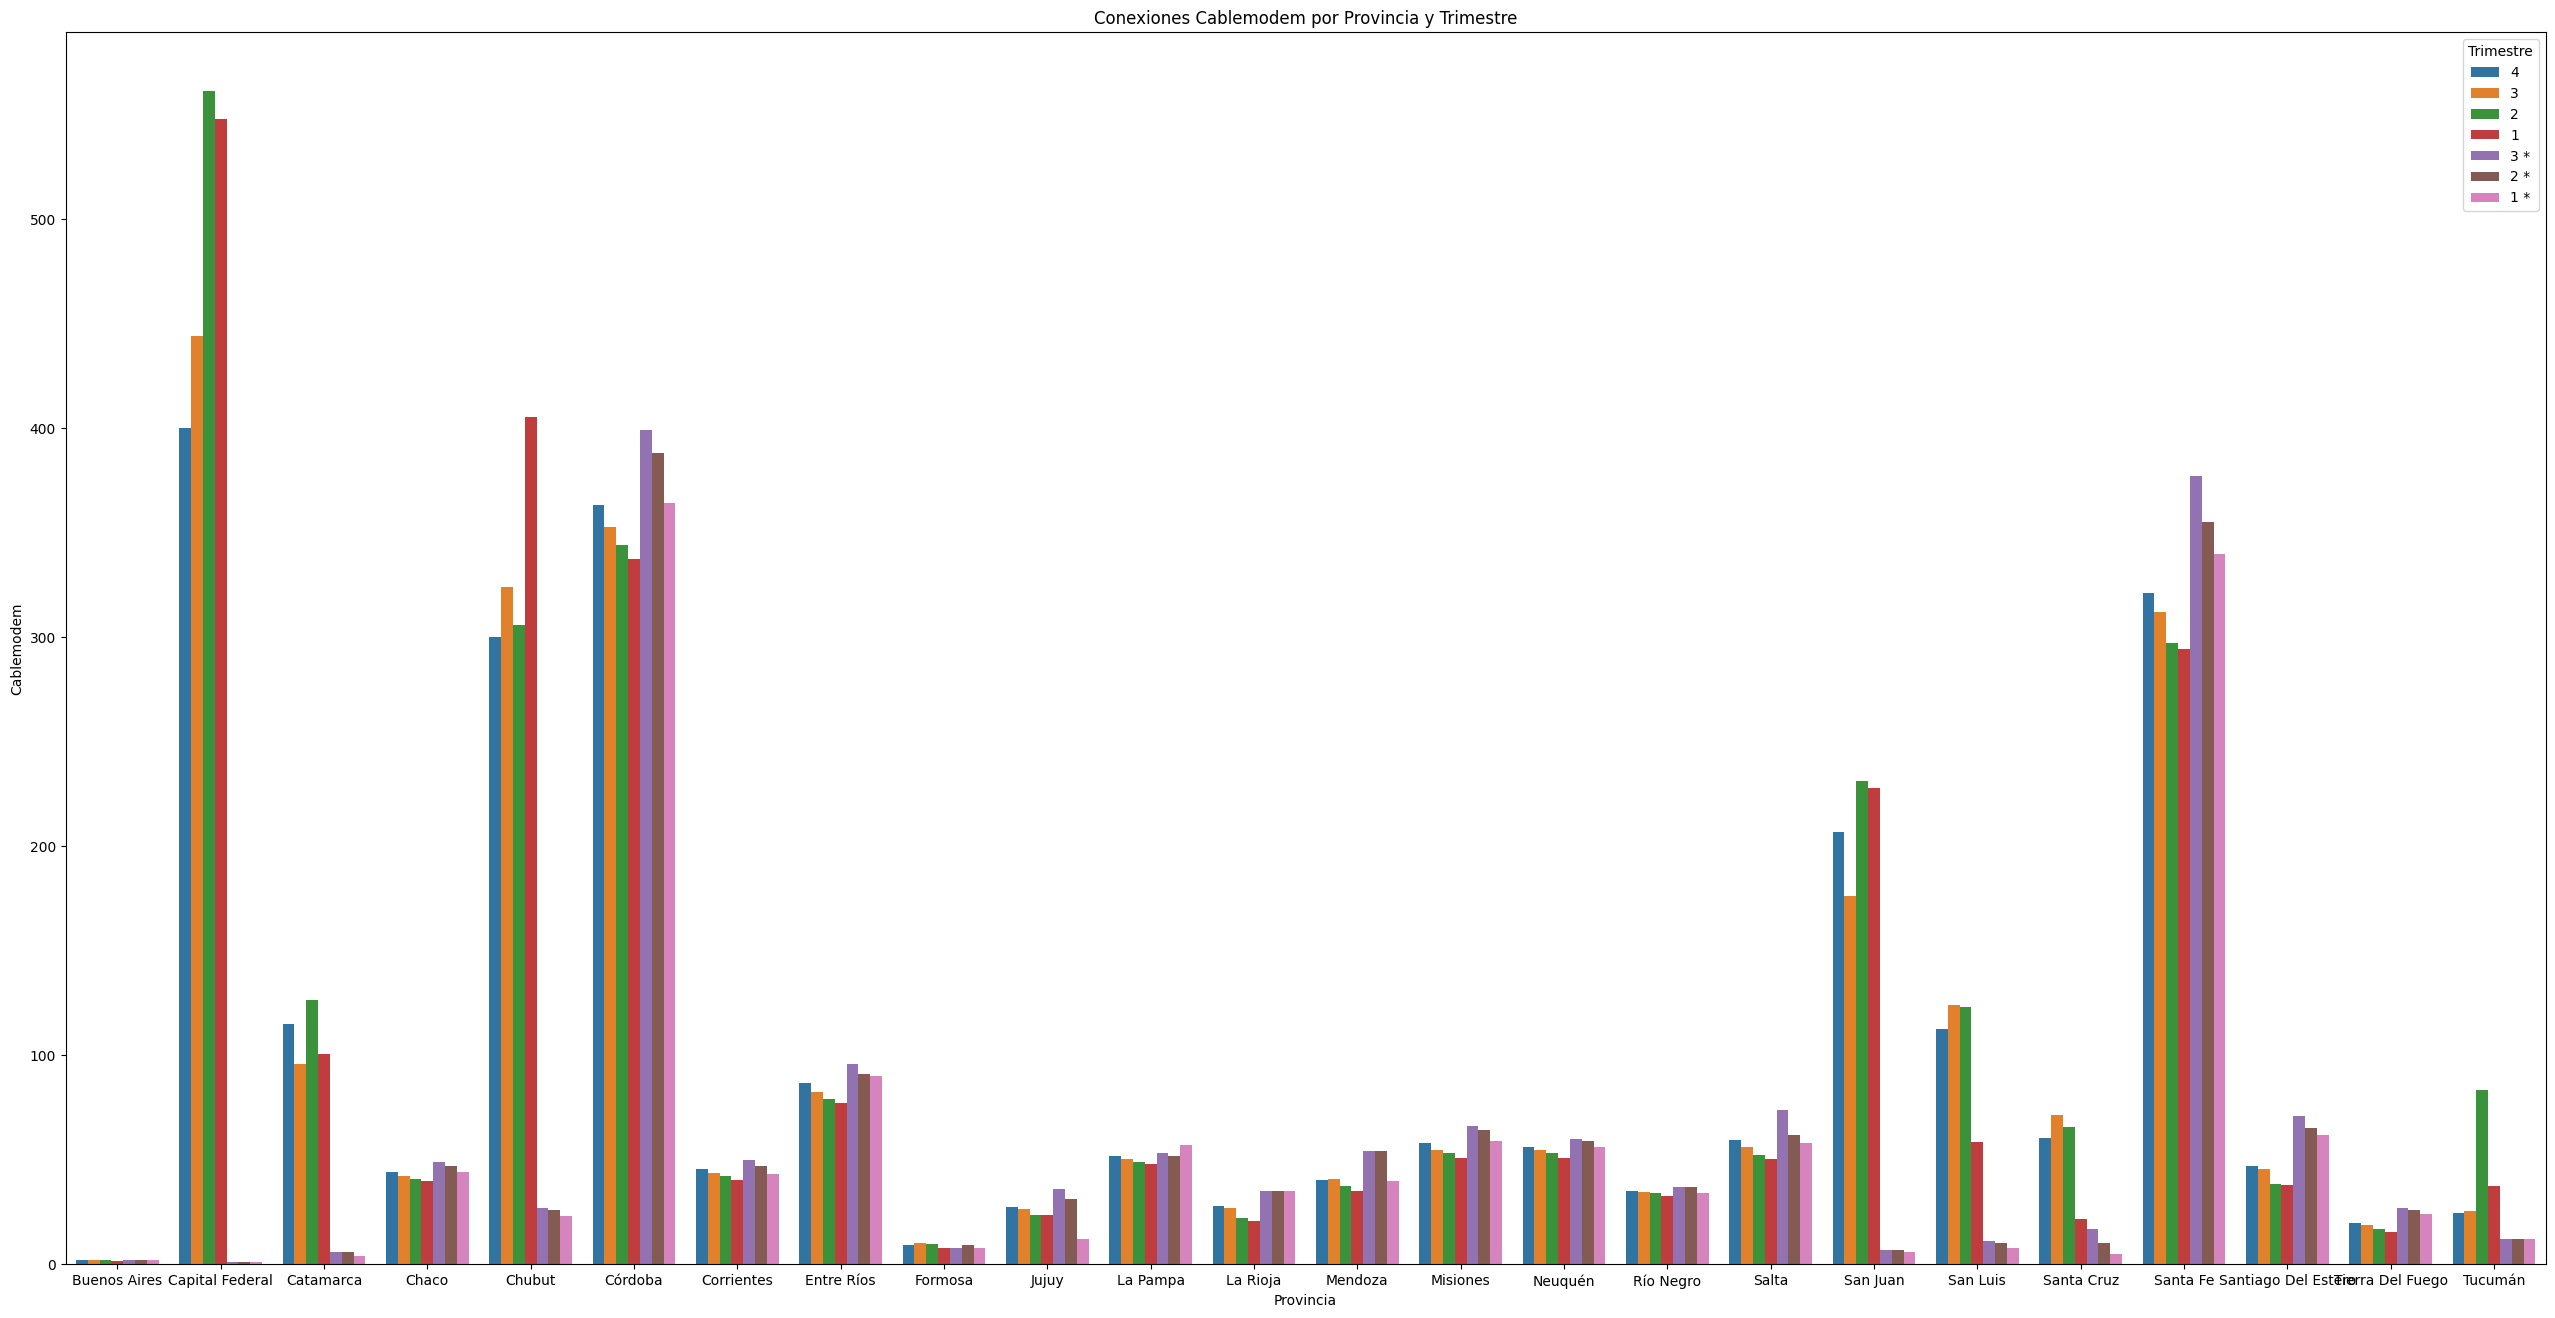

In [ ]:

plt.figure(figsize=(32, 16))
sns.barplot(data=dfx6_eda, x='Provincia', y='Cablemodem', hue='Trimestre', ci=None)
plt.title('Conexiones Cablemodem por Provincia y Trimestre')
plt.show()




<ipython-input-41-2d0e91830b87>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




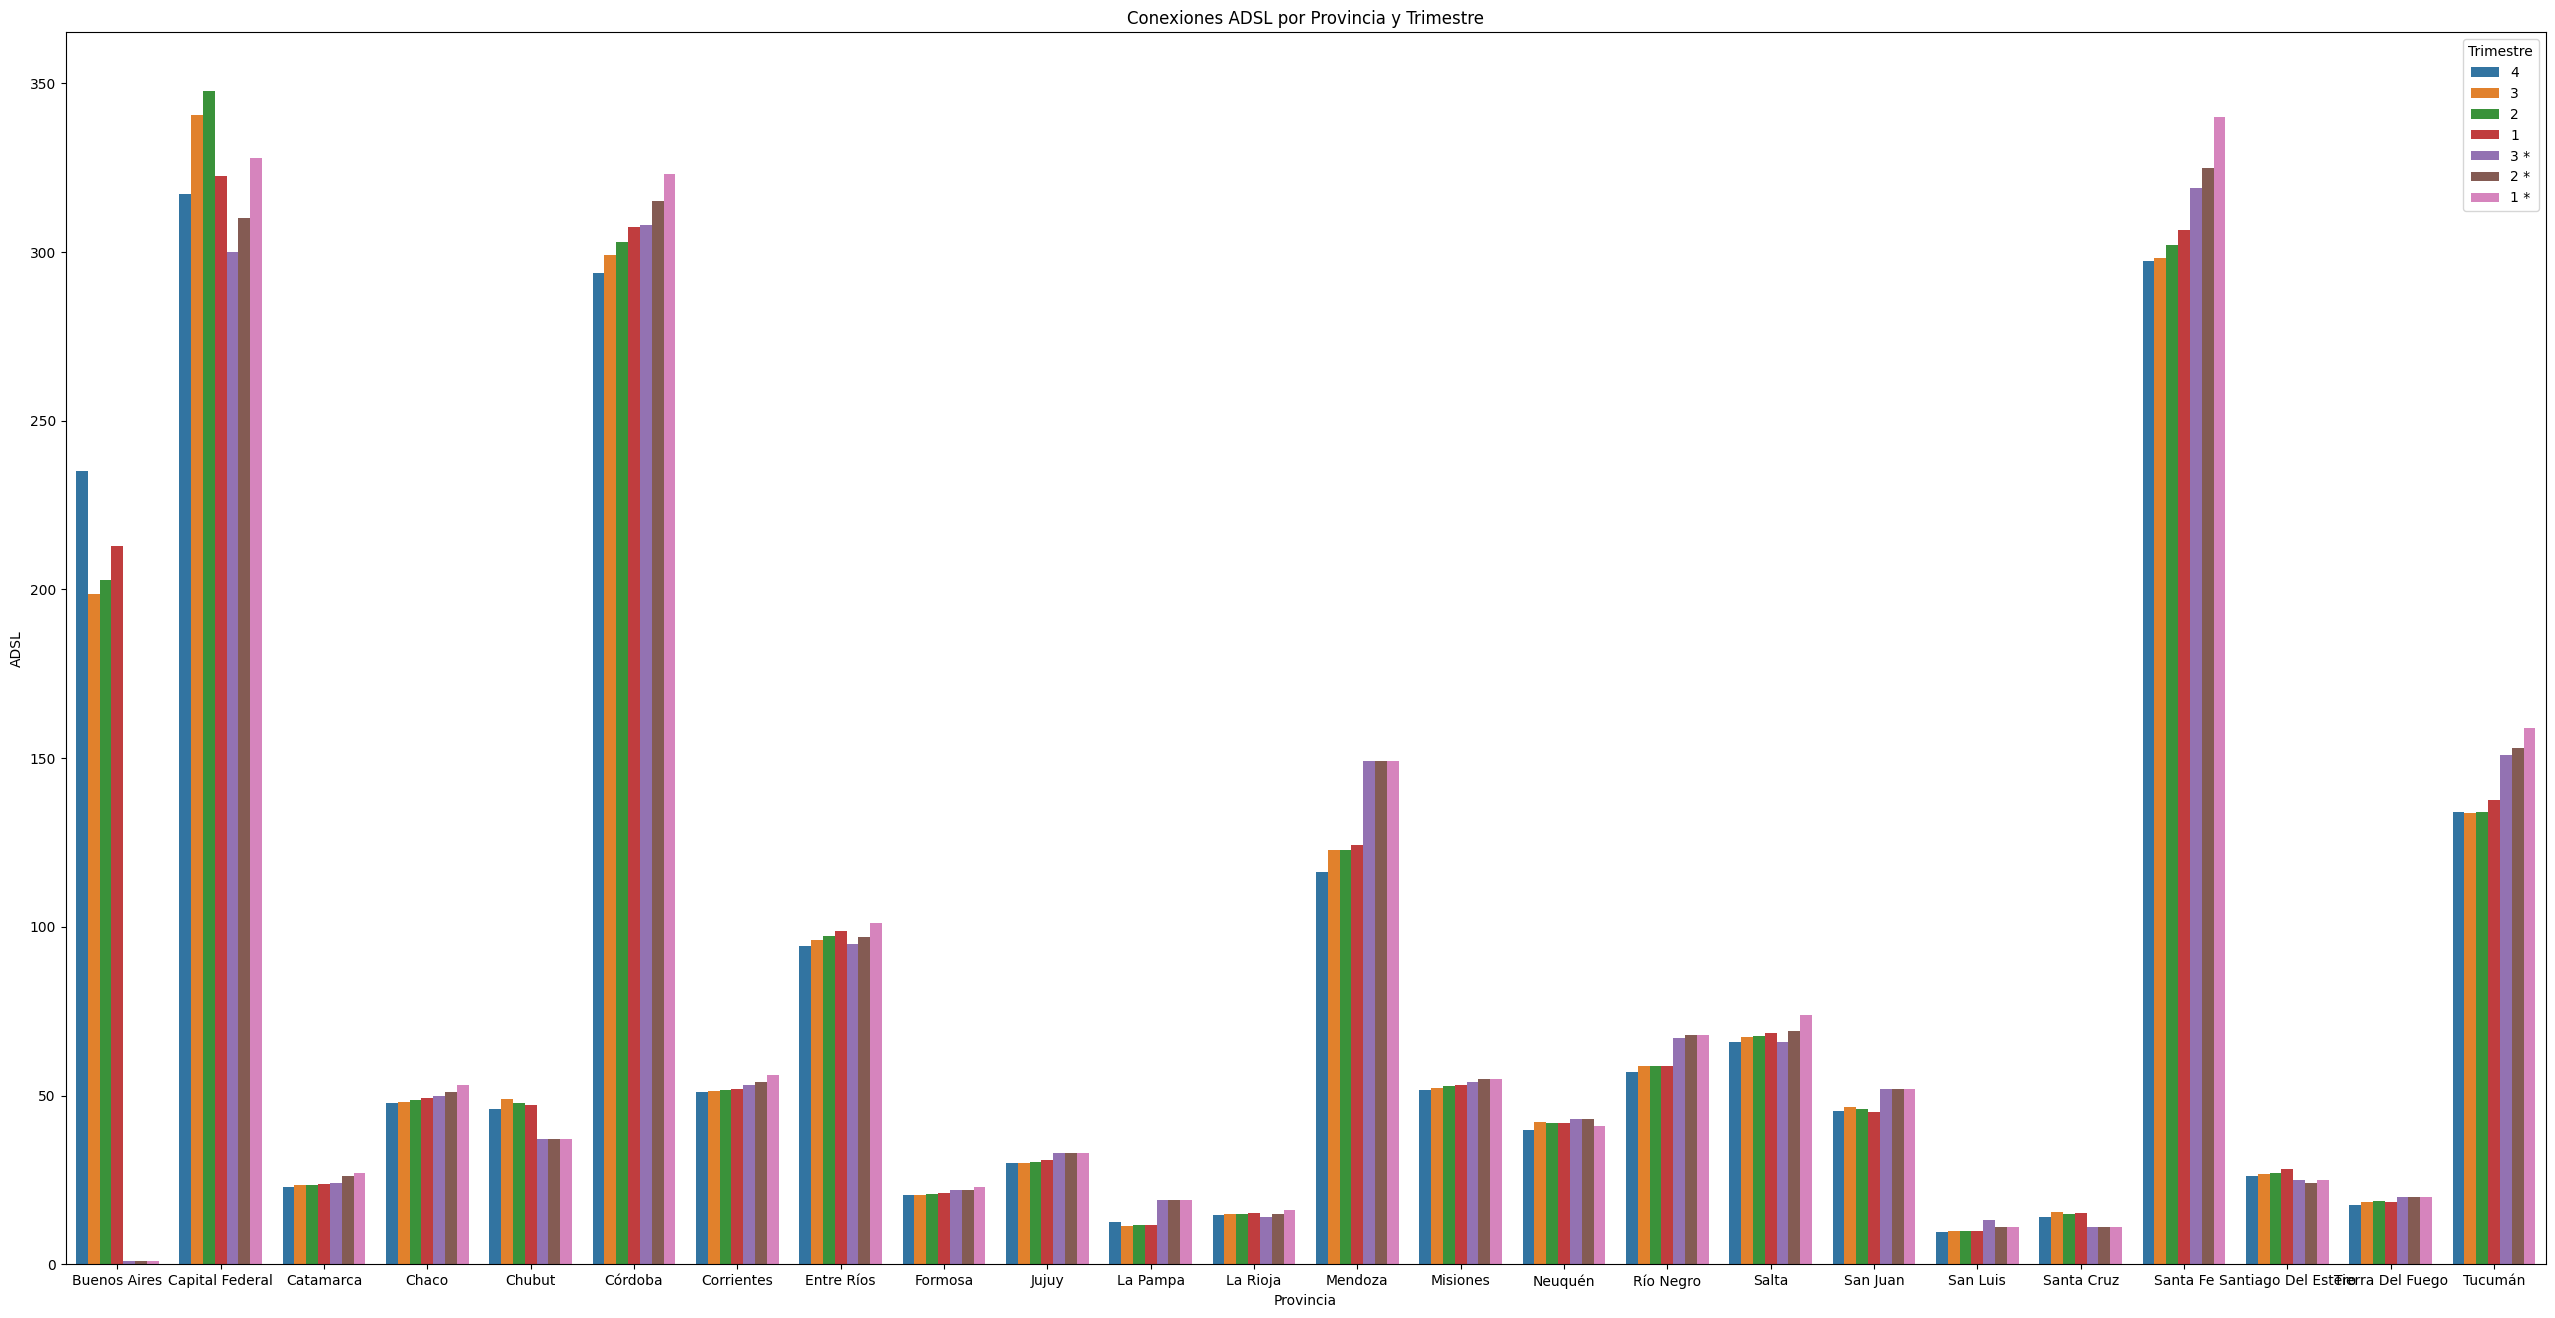

In [ ]:
plt.figure(figsize=(32, 16))
sns.barplot(data=dfx6_eda, x='Provincia', y='ADSL', hue='Trimestre', ci=None)
plt.title('Conexiones ADSL por Provincia y Trimestre')
plt.show()

**Gráfico de violín para la distribución de conexiones por tipo y Provincia**

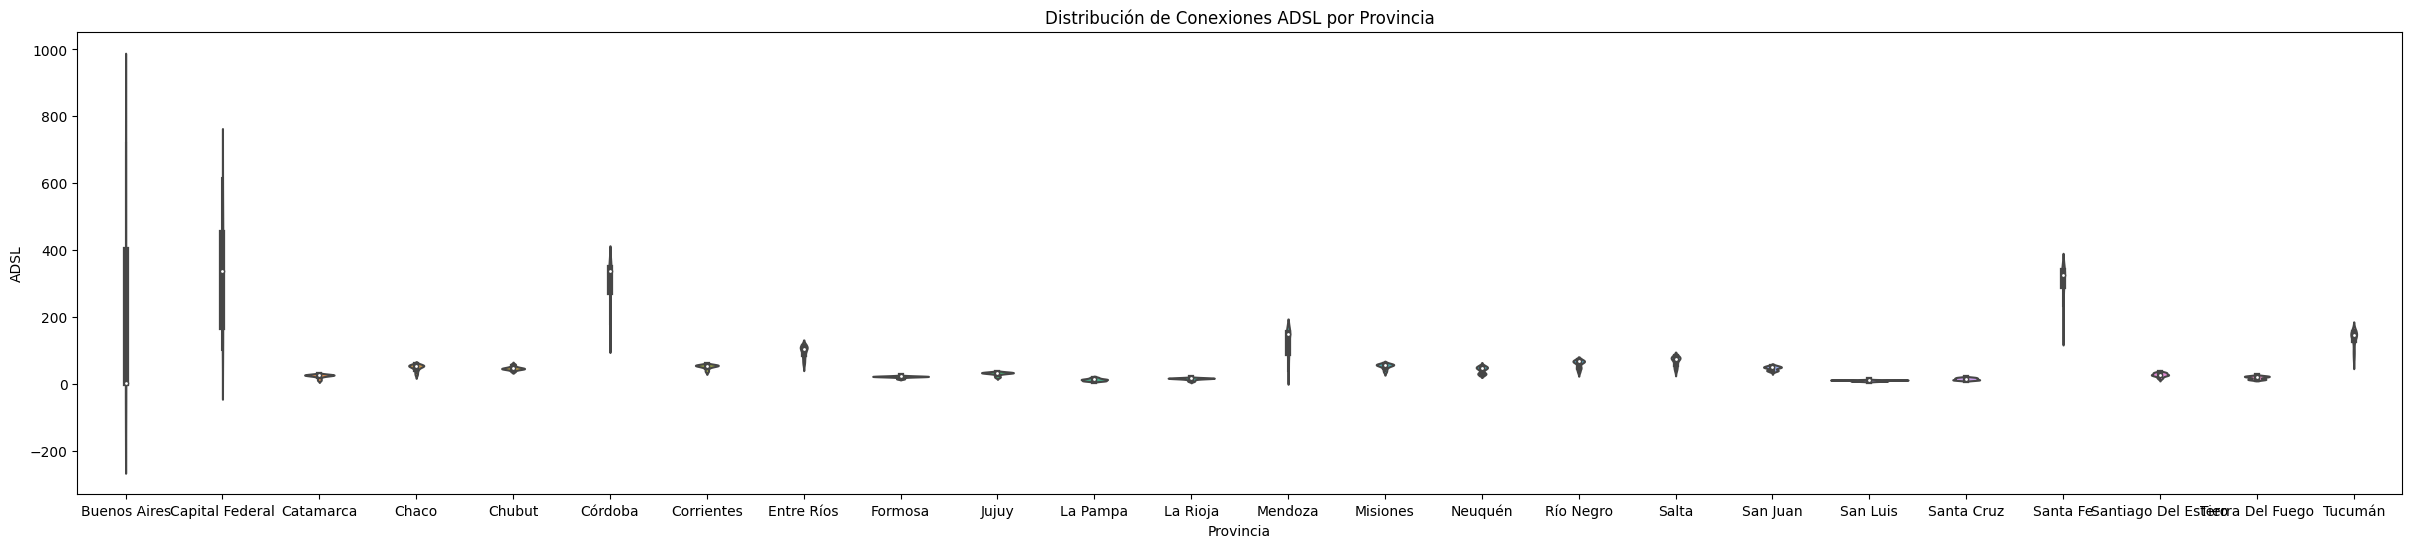

In [ ]:

plt.figure(figsize=(30, 6))
sns.violinplot(x='Provincia', y='ADSL', data=dfx6_eda)
plt.title('Distribución de Conexiones ADSL por Provincia')
plt.show()

**Gráfico de puntos para comparar dos tipos de conexión por Provincia**

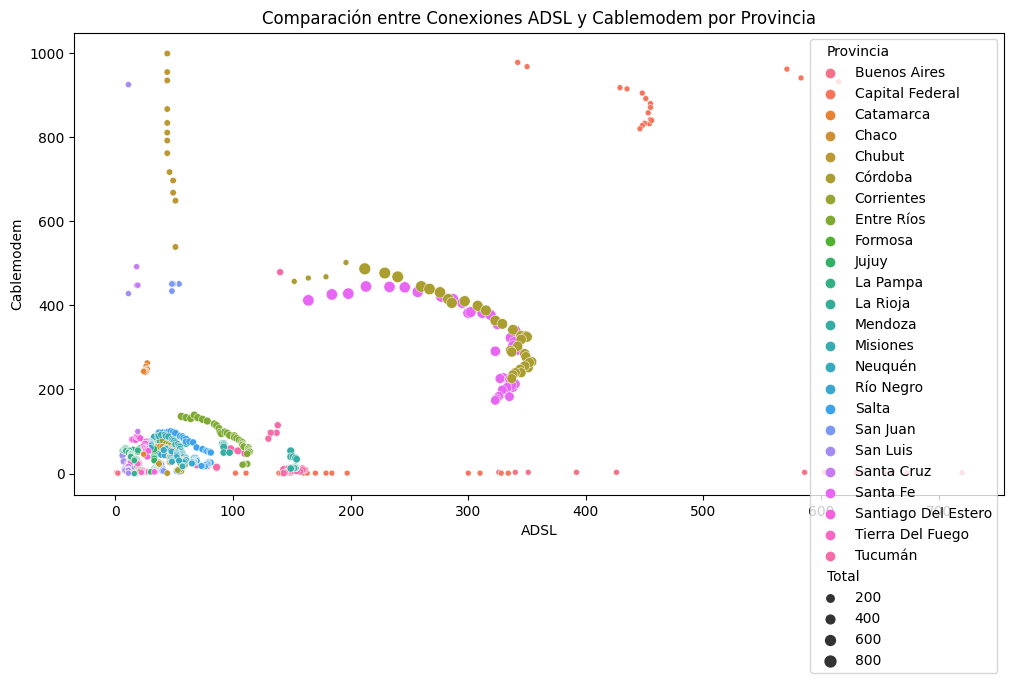

In [ ]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=dfx6_eda, x='ADSL', y='Cablemodem', hue='Provincia', size='Total')
plt.title('Comparación entre Conexiones ADSL y Cablemodem por Provincia')
plt.show()


# **EDA - Velocidad_Media_de_bajada_de_Internet_fijo**

In [ ]:
dfx7_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx7_Velocidad_Media_de_bajada_de_Internet_fijo.csv')


In [ ]:
dfx7_eda.head(3)

,Unnamed: 0,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,0,2022,4,10.656,Oct-Dic 2022
1,1,2022,3,6.246,Jul-Sept 2022
2,2,2022,2,5.844,Abr-Jun 2022


** Estadísticas descriptivas generales**

In [ ]:

estadisticas_generales = dfx7_eda.describe()

estadisticas_por_tiempo = dfx7_eda.groupby(['Año', 'Trimestre']).describe()

print(estadisticas_generales)
print(estadisticas_por_tiempo)


       Unnamed: 0          Año  Trimestre  Mbps (Media de bajada)
count   36.000000    36.000000  36.000000               36.000000
mean    17.500000  2018.000000   2.500000              221.615333
std     10.535654     2.618615   1.133893              275.439068
min      0.000000  2014.000000   1.000000                1.201000
25%      8.750000  2016.000000   1.750000                3.520500
50%     17.500000  2018.000000   2.500000                5.677500
75%     26.250000  2020.000000   3.250000              461.000000
max     35.000000  2022.000000   4.000000              834.000000
               Unnamed: 0                                          \
                    count  mean std   min   25%   50%   75%   max   
Año  Trimestre                                                      
2014 1                1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
     2                1.0  34.0 NaN  34.0  34.0  34.0  34.0  34.0   
     3                1.0  33.0 NaN  33.0  33.0  33.0  33.0  

**Visualizaciones**

**Histograma y Boxplot para la velocidad media de bajada**

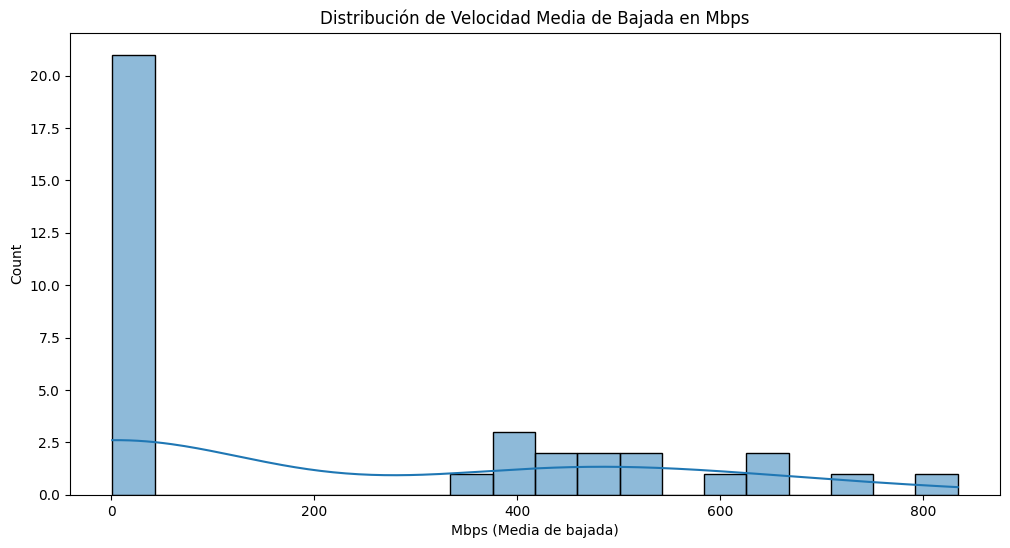

In [ ]:
# Histograma y Boxplot para la velocidad media de bajada
plt.figure(figsize=(12, 6))
sns.histplot(data=dfx7_eda, x='Mbps (Media de bajada)', bins=20, kde=True)
plt.title('Distribución de Velocidad Media de Bajada en Mbps')
plt.show()

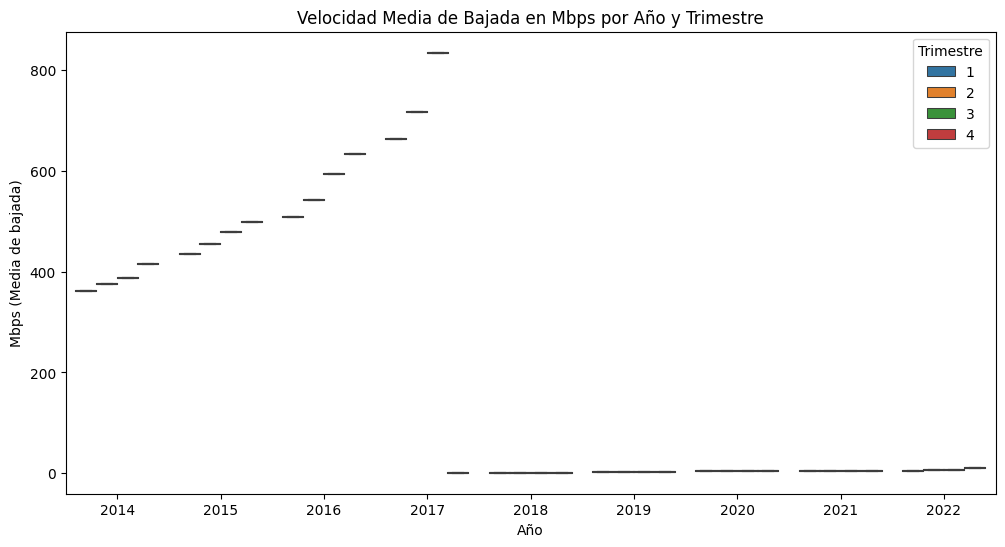

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfx7_eda, x='Año', y='Mbps (Media de bajada)', hue='Trimestre')
plt.title('Velocidad Media de Bajada en Mbps por Año y Trimestre')
plt.show()

# **EDA - Velocidad media de bajada de Internet fijo por provincia**

In [ ]:
dfx8_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx8_Velocidad media de bajada de Internet fijo por provincia.csv')


In [ ]:
dfx8_eda.head(3)

,Unnamed: 0,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,0,2022,4,Buenos Aires,111.000
1,1,2022,4,Capital Federal,18.286
2,2,2022,4,Catamarca,8.333


**Estadísticas Descriptivas**

In [ ]:

estadisticas_generales = dfx8_eda.describe()

estadisticas_por_provincia = dfx8_eda.groupby(['Año', 'Trimestre', 'Provincia']).describe()

print(estadisticas_generales)
print(estadisticas_por_provincia)


       Unnamed: 0          Año   Trimestre  Mbps (Media de bajada)
count  864.000000   864.000000  864.000000              864.000000
mean   431.500000  2018.000000    2.500000              302.410067
std    249.559612     2.583484    1.118682              287.314571
min      0.000000  2014.000000    1.000000                1.000000
25%    215.750000  2016.000000    1.750000                2.808500
50%    431.500000  2018.000000    2.500000              344.000000
75%    647.250000  2020.000000    3.250000              520.250000
max    863.000000  2022.000000    4.000000              988.000000
                                   Unnamed: 0                                  \
                                        count   mean std    min    25%    50%   
Año  Trimestre Provincia                                                        
2014 1         Buenos Aires               1.0  840.0 NaN  840.0  840.0  840.0   
               Capital Federal            1.0  841.0 NaN  841.0  841.0  8

**Histograma y Boxplot para la velocidad media de bajada por Provincia**

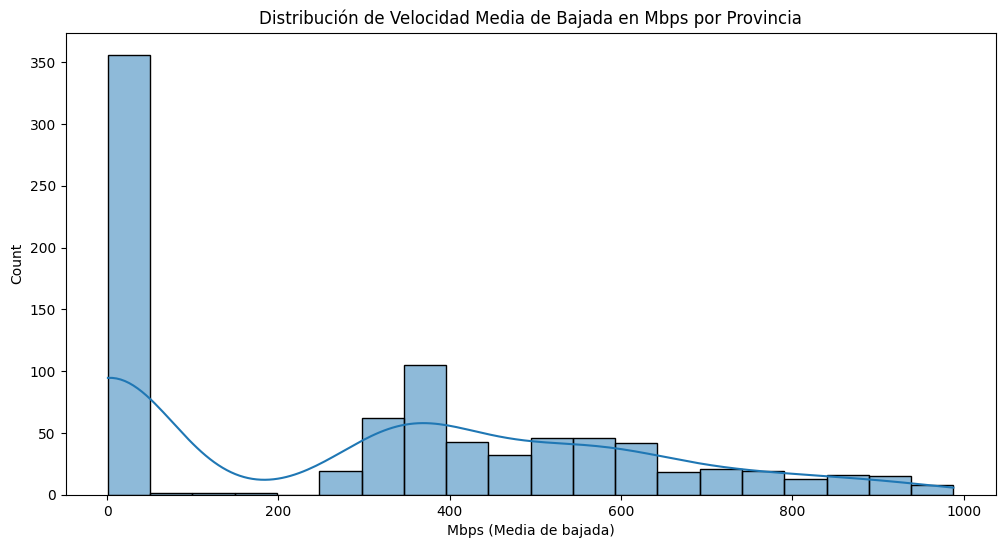

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data=dfx8_eda, x='Mbps (Media de bajada)', bins=20, kde=True)
plt.title('Distribución de Velocidad Media de Bajada en Mbps por Provincia')
plt.show()

**Gráfico de Caja por Año y Trimestre**

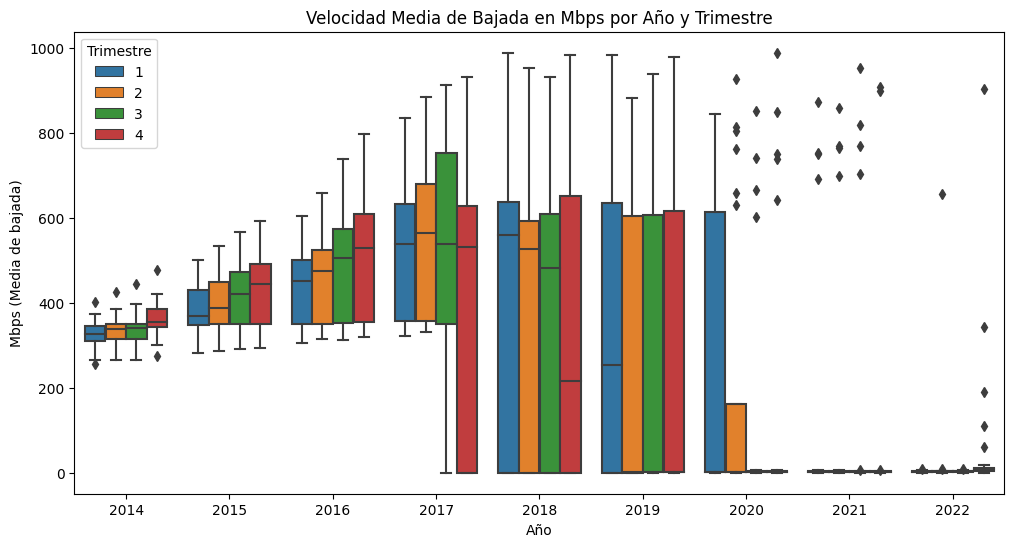

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=dfx8_eda, x='Año', y='Mbps (Media de bajada)', hue='Trimestre')
plt.title('Velocidad Media de Bajada en Mbps por Año y Trimestre')
plt.show()


**Gráfico de Violín**

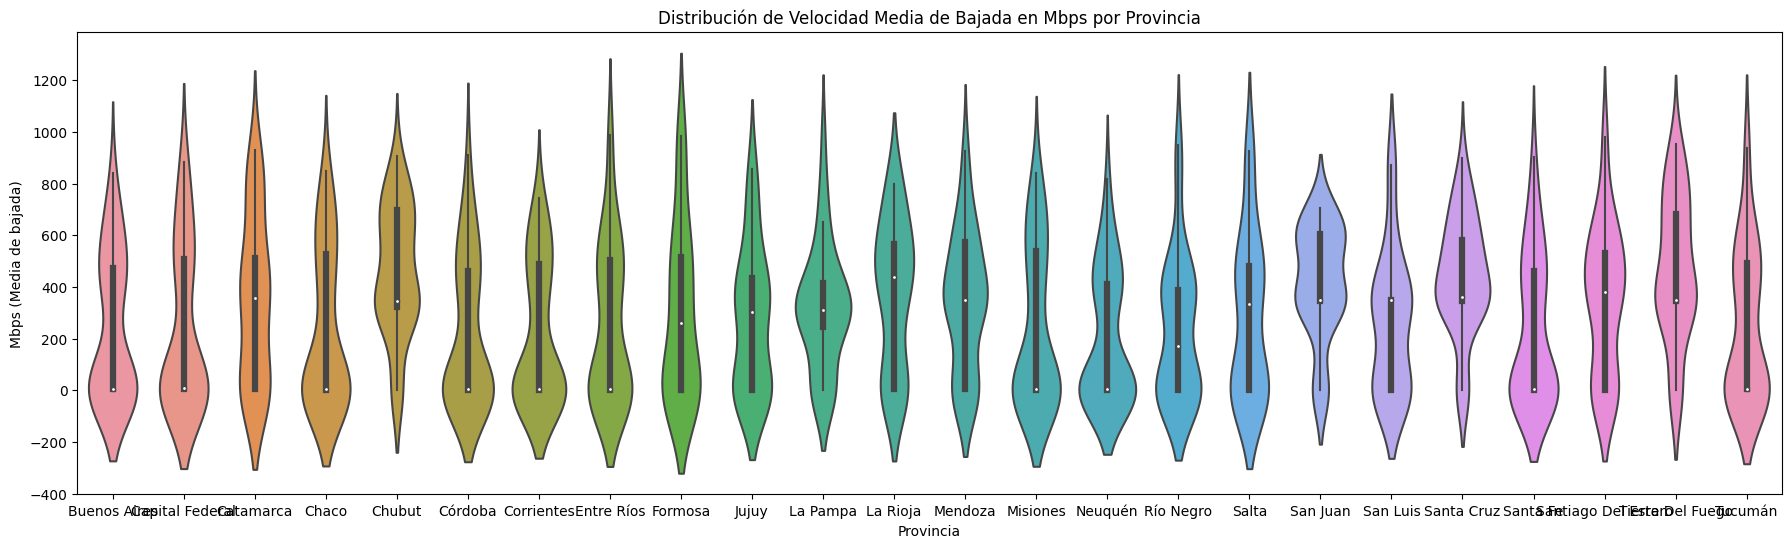

In [ ]:

plt.figure(figsize=(22, 6))
sns.violinplot(x='Provincia', y='Mbps (Media de bajada)', data=dfx8_eda)
plt.title('Distribución de Velocidad Media de Bajada en Mbps por Provincia')
plt.show()

# **EDA - Ingresos trimestrales por la prestación del servicio de Internet fijo**





In [ ]:
dfx12_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx12_Ingresos trimestrales por la prestación del servicio de Internet fijo.csv')


In [ ]:
dfx12_eda.head(3)

,Unnamed: 0,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,0,2022,4,72,Oct-Dic 2022
1,1,2022,3,64,Jul-Sept 2022
2,2,2022,2,60,Abr-Jun 2022


**Histograma y Boxplot para los ingresos por Año y Trimestre**

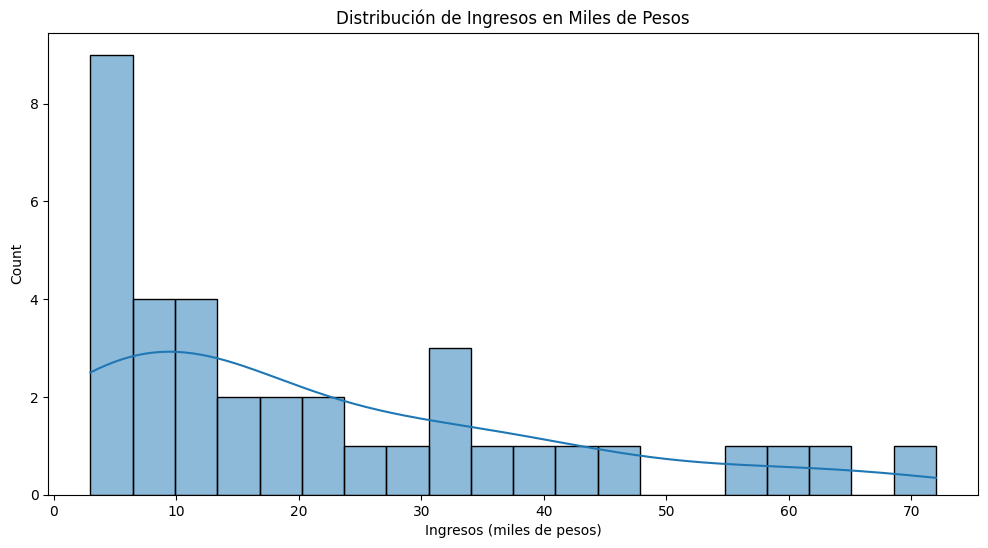

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data=dfx12_eda, x='Ingresos (miles de pesos)', bins=20, kde=True)
plt.title('Distribución de Ingresos en Miles de Pesos')
plt.show()

**Gráfico de Caja por Año y Trimestre**

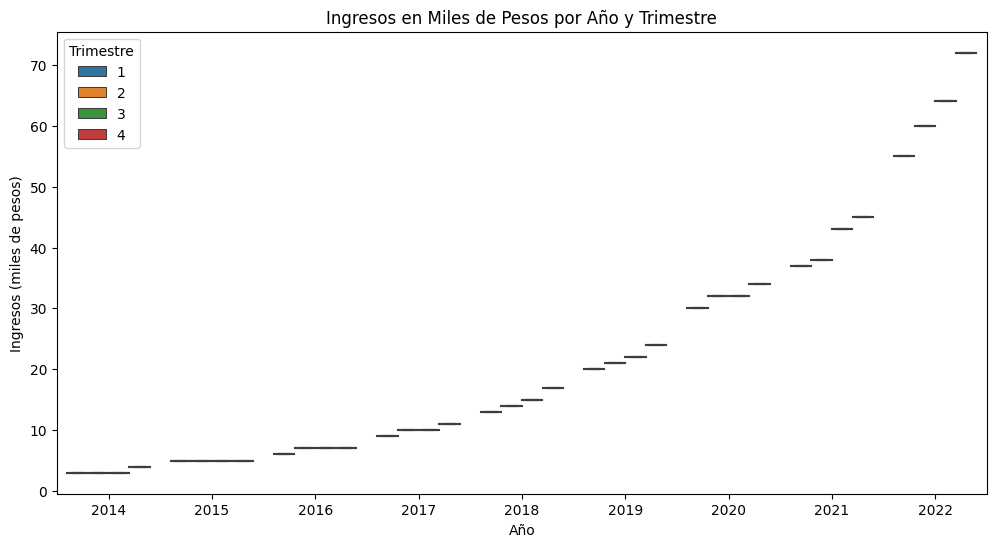

In [ ]:
# Gráfico de Caja por Año y Trimestre
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfx12_eda, x='Año', y='Ingresos (miles de pesos)', hue='Trimestre')
plt.title('Ingresos en Miles de Pesos por Año y Trimestre')
plt.show()

# **Primer KPIS - Mejora del acceso al servicio de internet**

***Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.***

In [ ]:
dfx1_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx1_penetracion_internet_fijo.csv')

In [ ]:
dfx1_eda.head(3)

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,0,2022,4,Buenos Aires,79
1,1,2022,4,Capital Federal,123
2,2,2022,4,Catamarca,66


***Calcular Nuevo Acceso considerando un aumento del 2%***

In [ ]:
dfx1_eda['Nuevo_acceso'] = dfx1_eda['Accesos por cada 100 hogares'] * 1.02

In [ ]:
dfx1_eda.head(5)

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Nuevo_acceso
0,0,2022,4,Buenos Aires,79,80.58
1,1,2022,4,Capital Federal,123,125.46
2,2,2022,4,Catamarca,66,67.32
3,3,2022,4,Chaco,44,44.88
4,4,2022,4,Chubut,86,87.72


***Calcular KPI***

In [ ]:
dfx1_eda['KPI'] = ((dfx1_eda['Nuevo_acceso'] - dfx1_eda['Accesos por cada 100 hogares']) / dfx1_eda['Accesos por cada 100 hogares']) * 100

In [ ]:
dfx1_eda.head(5)

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Nuevo_acceso,KPI
0,0,2022,4,Buenos Aires,79,80.58,2.0
1,1,2022,4,Capital Federal,123,125.46,2.0
2,2,2022,4,Catamarca,66,67.32,2.0
3,3,2022,4,Chaco,44,44.88,2.0
4,4,2022,4,Chubut,86,87.72,2.0


***DataFrame con los resultados***

In [ ]:
print(dfx1_eda[['Provincia', 'Accesos por cada 100 hogares', 'Nuevo_acceso', 'KPI']])


               Provincia  Accesos por cada 100 hogares  Nuevo_acceso  KPI
0           Buenos Aires                            79         80.58  2.0
1        Capital Federal                           123        125.46  2.0
2              Catamarca                            66         67.32  2.0
3                  Chaco                            44         44.88  2.0
4                 Chubut                            86         87.72  2.0
..                   ...                           ...           ...  ...
859           Santa Cruz                            29         29.58  2.0
860             Santa Fe                            48         48.96  2.0
861  Santiago Del Estero                            16         16.32  2.0
862     Tierra Del Fuego                            64         65.28  2.0
863              Tucumán                            33         33.66  2.0

[864 rows x 4 columns]


In [ ]:
#Guardar el DataFrame en un archivo CSV
dfx1_eda.to_excel("/content/drive/MyDrive/proyect_telecomunicaciones/kpi_primero.xlsx", index=True)

***Graficar el KPI por provincia***

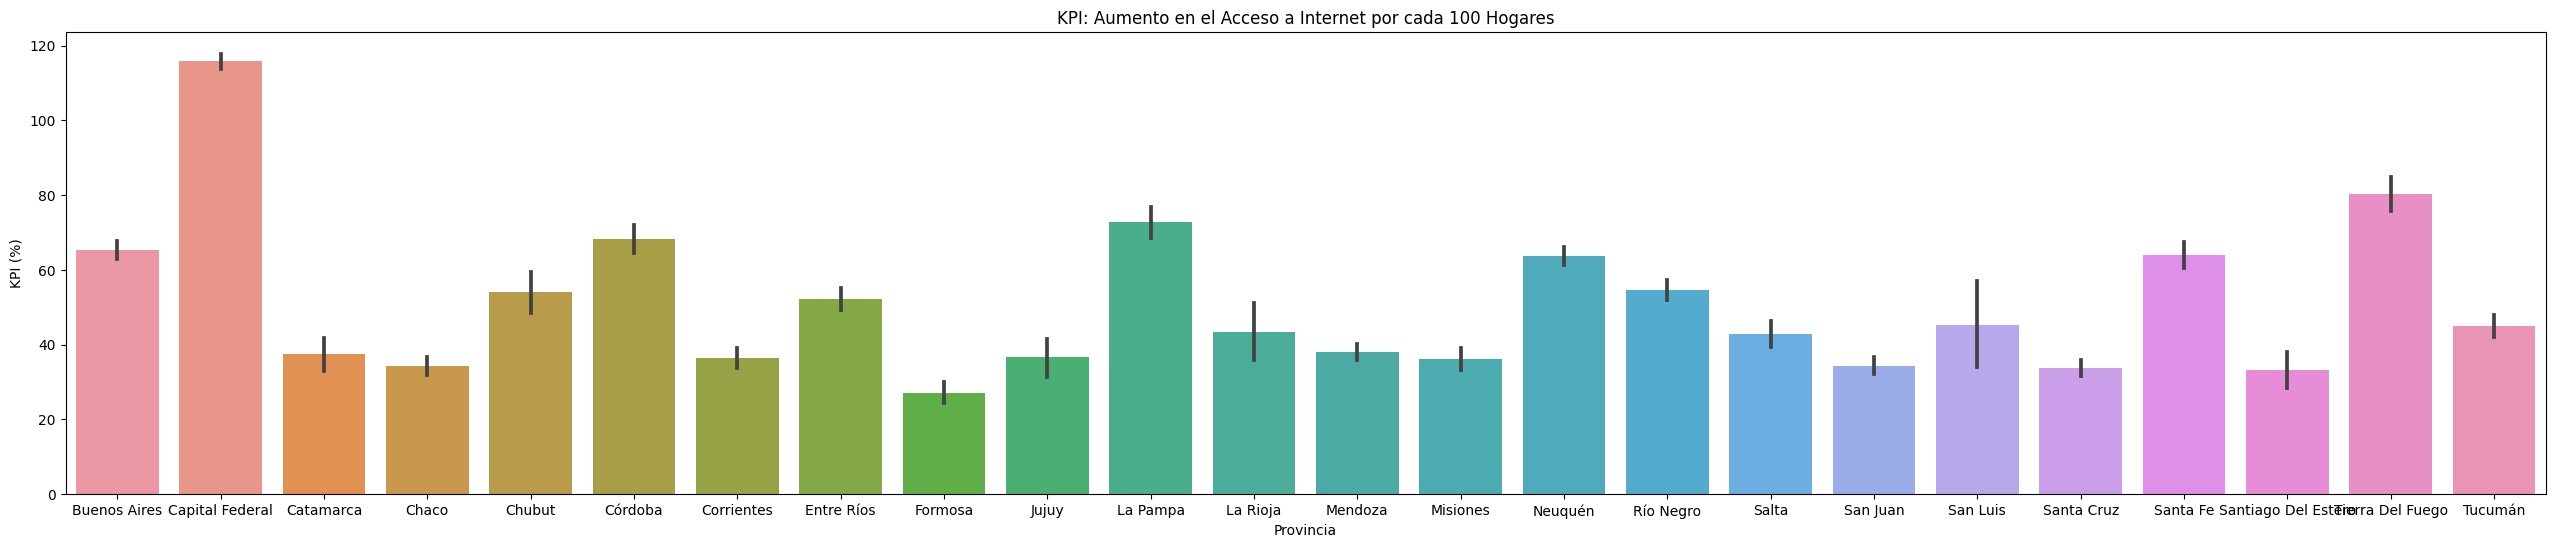

In [ ]:
plt.figure(figsize=(32, 6))
sns.barplot(data=dfx1_eda, x='Provincia', y='Nuevo_acceso')
plt.title('KPI: Aumento en el Acceso a Internet por cada 100 Hogares')
plt.xlabel('Provincia')
plt.ylabel('KPI (%)')
plt.show()

# **Segundo KPI: Mejora en la Velocidad Media de Bajada**

In [ ]:
dfx8_eda = pd.read_csv('/content/drive/MyDrive/proyect_telecomunicaciones/dfx8_Velocidad media de bajada de Internet fijo por provincia.csv')


In [ ]:
dfx8_eda.head(5)

,Unnamed: 0,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,0,2022,4,Buenos Aires,111.000
1,1,2022,4,Capital Federal,18.286
2,2,2022,4,Catamarca,8.333
3,3,2022,4,Chaco,10.402
4,4,2022,4,Chubut,1.592


La fórmula podría ser la siguiente:

KPI Velocidad = ((Nueva Velocidad Media - Velocidad Media Actual)/Velocidad Media Actual) * 100

***Nueva Velocidad Media considerando una mejora del 5%***

In [ ]:
dfx8_eda['Nueva_Velocidad_Media'] = dfx8_eda['Mbps (Media de bajada)'] * 1.05

In [ ]:
dfx8_eda.head(5)

,Unnamed: 0,Año,Trimestre,Provincia,Mbps (Media de bajada),Nueva_Velocidad_Media
0,0,2022,4,Buenos Aires,111.000,116.55000
1,1,2022,4,Capital Federal,18.286,19.20030
2,2,2022,4,Catamarca,8.333,8.74965
3,3,2022,4,Chaco,10.402,10.92210
4,4,2022,4,Chubut,1.592,1.67160


***KPI de Velocidad Media***

In [ ]:
dfx8_eda['KPI_Velocidad'] = ((dfx8_eda['Nueva_Velocidad_Media'] - dfx8_eda['Mbps (Media de bajada)']) / dfx8_eda['Mbps (Media de bajada)']) * 100

In [ ]:
dfx8_eda.head(5)

,Unnamed: 0,Año,Trimestre,Provincia,Mbps (Media de bajada),Nueva_Velocidad_Media,KPI_Velocidad
0,0,2022,4,Buenos Aires,111.000,116.55000,5.0
1,1,2022,4,Capital Federal,18.286,19.20030,5.0
2,2,2022,4,Catamarca,8.333,8.74965,5.0
3,3,2022,4,Chaco,10.402,10.92210,5.0
4,4,2022,4,Chubut,1.592,1.67160,5.0


In [ ]:
#Guardar el DataFrame en un archivo CSV
dfx8_eda.to_csv("/content/drive/MyDrive/proyect_telecomunicaciones/kpi_segundo.csv", index=True)

***DataFrame con los resultados***

In [ ]:
print(dfx8_eda[['Provincia', 'Mbps (Media de bajada)', 'Nueva_Velocidad_Media', 'KPI_Velocidad']])

               Provincia  Mbps (Media de bajada)  Nueva_Velocidad_Media  \
0           Buenos Aires                 111.000              116.55000   
1        Capital Federal                  18.286               19.20030   
2              Catamarca                   8.333                8.74965   
3                  Chaco                  10.402               10.92210   
4                 Chubut                   1.592                1.67160   
..                   ...                     ...                    ...   
859           Santa Cruz                 332.000              348.60000   
860             Santa Fe                 315.000              330.75000   
861  Santiago Del Estero                 295.000              309.75000   
862     Tierra Del Fuego                 345.000              362.25000   
863              Tucumán                 321.000              337.05000   

     KPI_Velocidad  
0              5.0  
1              5.0  
2              5.0  
3              

***Gráfico de barras para el KPI de Velocidad Media por provincia***

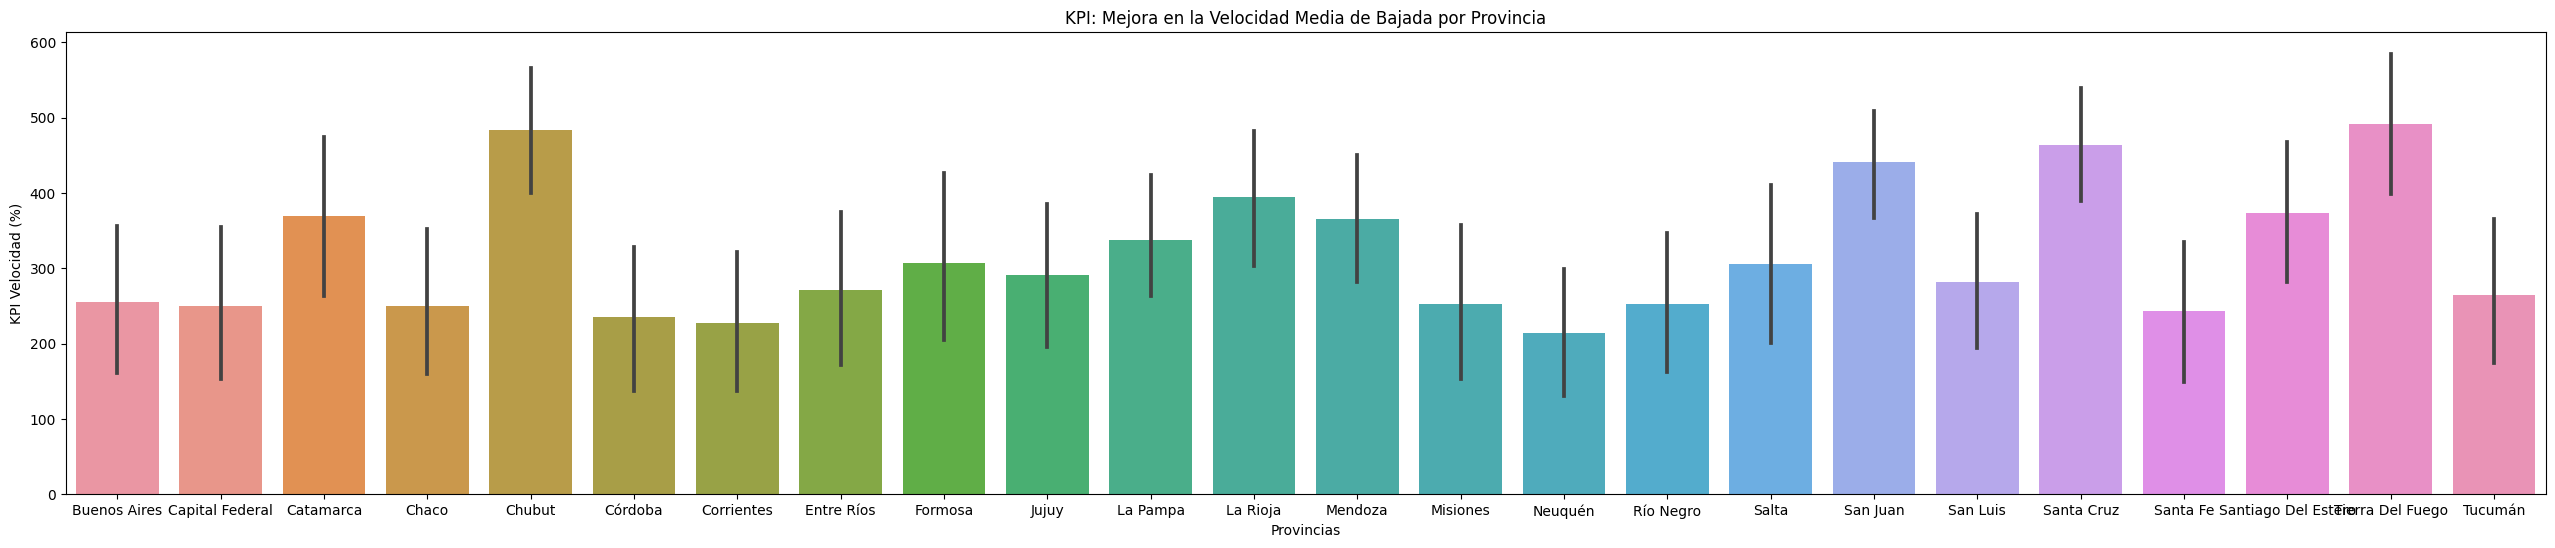

In [ ]:

plt.figure(figsize=(32, 6))
sns.barplot(data=dfx8_eda, x='Provincia', y='Nueva_Velocidad_Media')
plt.title('KPI: Mejora en la Velocidad Media de Bajada por Provincia')
plt.xlabel('Provincias')
plt.ylabel('KPI Velocidad (%)')
plt.show()